In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from collections import defaultdict as dd
from tqdm import tqdm
import pickle
import json
import gzip

## Sample games

In [2]:
games_list = os.listdir('../presentables/raw_predicted_scores/')

In [3]:
year = 2024
sqrt_mean_squared_error = 0.087452

In [4]:
all_games_player_distributions = dict()
games_list = [game for game in games_list if game.startswith(str(year))]

In [5]:
train_data = pd.read_csv('../data/curated/modelling/graph_train.csv')

with open('../models/feature_importance_ordering.pickle', 'rb') as f:
    feature_importance_ordering = pickle.load(f)

In [6]:
np.random.seed(0)
n_samples = 50000

In [7]:
X = train_data[list(list(feature_importance_ordering.keys())[-1])].values

In [8]:
all_games_simulation = dd(dict)

number_of_games = 0
for game_filename in tqdm(games_list):

    # read in predicted scores
    predicted_game = pd.read_csv(
        f'../presentables/raw_predicted_scores/{game_filename}')

    round_number = game_filename.split('_')[1].split('.')[0]
    team1 = game_filename.split('_')[2].split('v')[0].strip()
    team2 = game_filename.split('v')[1].split('.')[0].strip()

    game_features = pd.read_csv(
        f'../future data/curated/NormalisedData/{year} Round {round_number.strip("round")} {team1} v {team2}  (N).csv')

    x = game_features[list(
        list(feature_importance_ordering.keys())[-1])].values

    diag = np.diag(x @ np.linalg.inv(np.transpose(X) @ X) @ np.transpose(x))

    # simulate game
    n_players = len(predicted_game)
    predicted_scores = predicted_game['predicted_score']
    players = predicted_game['player']

    # simulate the samples
    epsilon = np.random.normal(0, 1, n_players*n_samples)

    all_games_simulation[round_number][team1 + ' v ' + team2] = dict()

    for i in range(n_samples):
        sampled_game_score = predicted_scores + \
            epsilon[i*n_players:(i+1)*n_players] * \
            sqrt_mean_squared_error * np.sqrt(1+diag)
        sampled_game_score.sort_values(ascending=False, inplace=True)

        sampled_player_rank = [players[i] for i in sampled_game_score.index]

        all_games_simulation[round_number][team1 +
                                           ' v ' + team2][str(i)] = sampled_player_rank

  0%|          | 0/207 [00:00<?, ?it/s]

100%|██████████| 207/207 [12:52<00:00,  3.73s/it]


In [ ]:
with gzip.open(f'../presentables/new_{year}_simulated_games.json.gz', 'wb') as f:
    f.write(json.dumps(all_games_simulation).encode())

#### Research: prob convergence

Probability of Nick Daicos being the top player in Carlton v Collingwood is 0.5 after 10 samples
Probability of Nick Daicos being the top player in Carlton v Collingwood is 0.44 after 100 samples
Probability of Nick Daicos being the top player in Carlton v Collingwood is 0.426 after 1000 samples
Probability of Nick Daicos being the top player in Carlton v Collingwood is 0.4472 after 10000 samples
Probability of Nick Daicos being the top player in Carlton v Collingwood is 0.4502 after 20000 samples
Probability of Nick Daicos being the top player in Carlton v Collingwood is 0.4518 after 30000 samples
Probability of Nick Daicos being the top player in Carlton v Collingwood is 0.4509 after 40000 samples
Probability of Nick Daicos being the top player in Carlton v Collingwood is 0.4511 after 50000 samples


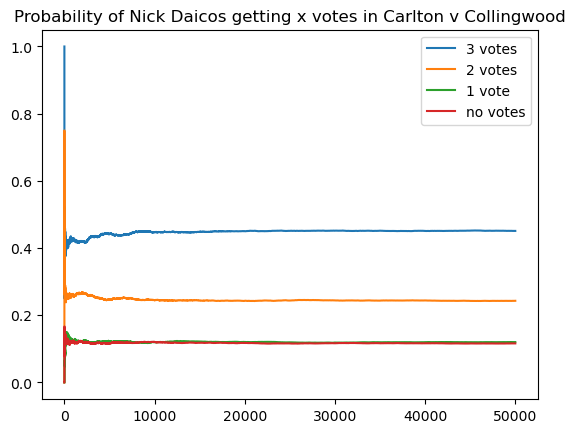

Probability of Will Hayward being the top player in Sydney v GWS is 0.2 after 10 samples
Probability of Will Hayward being the top player in Sydney v GWS is 0.34 after 100 samples
Probability of Will Hayward being the top player in Sydney v GWS is 0.334 after 1000 samples
Probability of Will Hayward being the top player in Sydney v GWS is 0.3246 after 10000 samples
Probability of Will Hayward being the top player in Sydney v GWS is 0.3248 after 20000 samples
Probability of Will Hayward being the top player in Sydney v GWS is 0.3236 after 30000 samples
Probability of Will Hayward being the top player in Sydney v GWS is 0.323 after 40000 samples
Probability of Will Hayward being the top player in Sydney v GWS is 0.3233 after 50000 samples


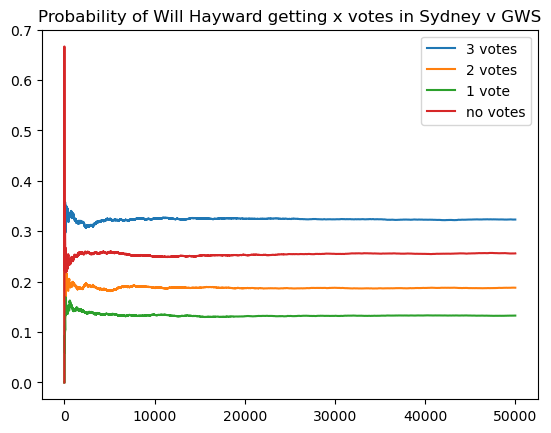

Probability of Luke Ryan being the top player in Richmond v Fremantle is 0.2 after 10 samples
Probability of Luke Ryan being the top player in Richmond v Fremantle is 0.21 after 100 samples
Probability of Luke Ryan being the top player in Richmond v Fremantle is 0.242 after 1000 samples
Probability of Luke Ryan being the top player in Richmond v Fremantle is 0.2714 after 10000 samples
Probability of Luke Ryan being the top player in Richmond v Fremantle is 0.2715 after 20000 samples
Probability of Luke Ryan being the top player in Richmond v Fremantle is 0.2734 after 30000 samples
Probability of Luke Ryan being the top player in Richmond v Fremantle is 0.2722 after 40000 samples
Probability of Luke Ryan being the top player in Richmond v Fremantle is 0.2696 after 50000 samples


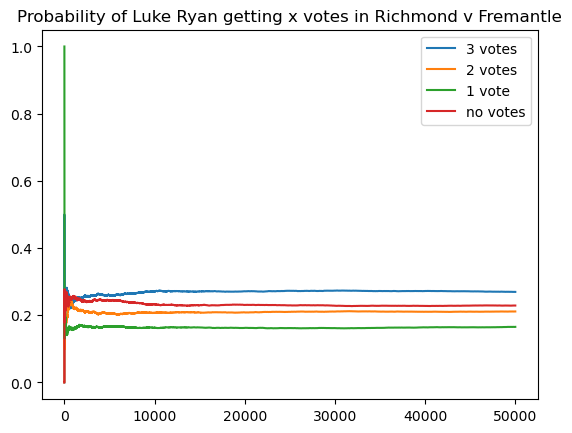

Probability of Jack Sinclair being the top player in StKilda v NorthMelbourne is 0.2 after 10 samples
Probability of Jack Sinclair being the top player in StKilda v NorthMelbourne is 0.37 after 100 samples
Probability of Jack Sinclair being the top player in StKilda v NorthMelbourne is 0.407 after 1000 samples
Probability of Jack Sinclair being the top player in StKilda v NorthMelbourne is 0.4361 after 10000 samples
Probability of Jack Sinclair being the top player in StKilda v NorthMelbourne is 0.4384 after 20000 samples
Probability of Jack Sinclair being the top player in StKilda v NorthMelbourne is 0.4414 after 30000 samples
Probability of Jack Sinclair being the top player in StKilda v NorthMelbourne is 0.4418 after 40000 samples
Probability of Jack Sinclair being the top player in StKilda v NorthMelbourne is 0.4416 after 50000 samples


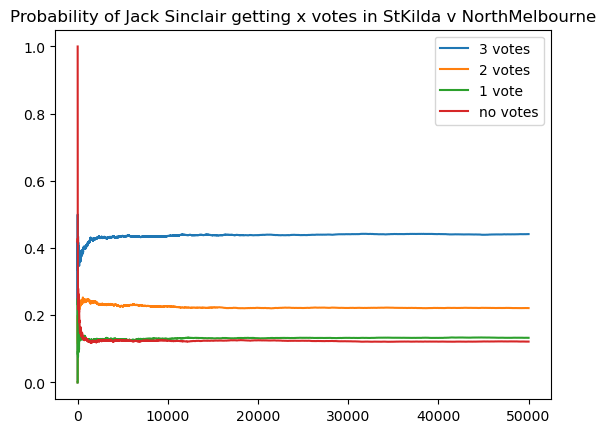

Probability of Darcy Parish being the top player in WestCoast v Essendon is 0.2 after 10 samples
Probability of Darcy Parish being the top player in WestCoast v Essendon is 0.36 after 100 samples
Probability of Darcy Parish being the top player in WestCoast v Essendon is 0.371 after 1000 samples
Probability of Darcy Parish being the top player in WestCoast v Essendon is 0.3647 after 10000 samples
Probability of Darcy Parish being the top player in WestCoast v Essendon is 0.3592 after 20000 samples
Probability of Darcy Parish being the top player in WestCoast v Essendon is 0.3609 after 30000 samples
Probability of Darcy Parish being the top player in WestCoast v Essendon is 0.3626 after 40000 samples
Probability of Darcy Parish being the top player in WestCoast v Essendon is 0.3633 after 50000 samples


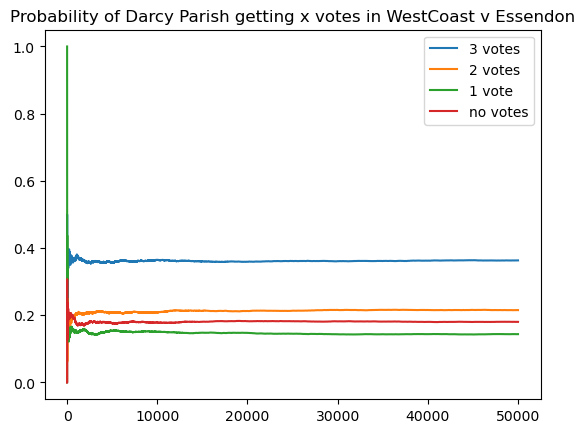

Probability of Jake Soligo being the top player in Adelaide v PortAdelaide is 0.3 after 10 samples
Probability of Jake Soligo being the top player in Adelaide v PortAdelaide is 0.27 after 100 samples
Probability of Jake Soligo being the top player in Adelaide v PortAdelaide is 0.317 after 1000 samples
Probability of Jake Soligo being the top player in Adelaide v PortAdelaide is 0.2858 after 10000 samples
Probability of Jake Soligo being the top player in Adelaide v PortAdelaide is 0.284 after 20000 samples
Probability of Jake Soligo being the top player in Adelaide v PortAdelaide is 0.284 after 30000 samples
Probability of Jake Soligo being the top player in Adelaide v PortAdelaide is 0.2822 after 40000 samples
Probability of Jake Soligo being the top player in Adelaide v PortAdelaide is 0.2826 after 50000 samples


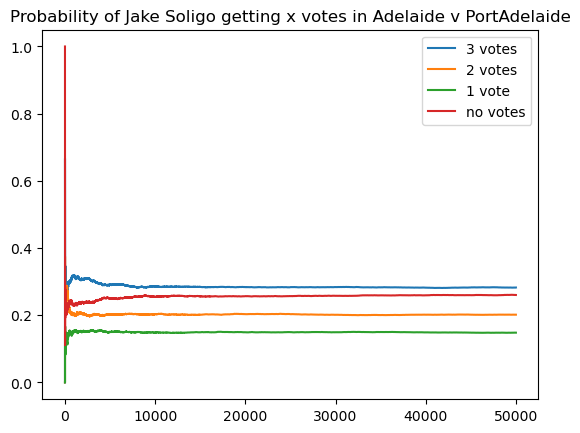

Probability of Marcus Bontempelli being the top player in WesternBulldogs v Hawthorn is 0.1 after 10 samples
Probability of Marcus Bontempelli being the top player in WesternBulldogs v Hawthorn is 0.22 after 100 samples
Probability of Marcus Bontempelli being the top player in WesternBulldogs v Hawthorn is 0.264 after 1000 samples
Probability of Marcus Bontempelli being the top player in WesternBulldogs v Hawthorn is 0.2566 after 10000 samples
Probability of Marcus Bontempelli being the top player in WesternBulldogs v Hawthorn is 0.2629 after 20000 samples
Probability of Marcus Bontempelli being the top player in WesternBulldogs v Hawthorn is 0.2606 after 30000 samples
Probability of Marcus Bontempelli being the top player in WesternBulldogs v Hawthorn is 0.258 after 40000 samples
Probability of Marcus Bontempelli being the top player in WesternBulldogs v Hawthorn is 0.2575 after 50000 samples


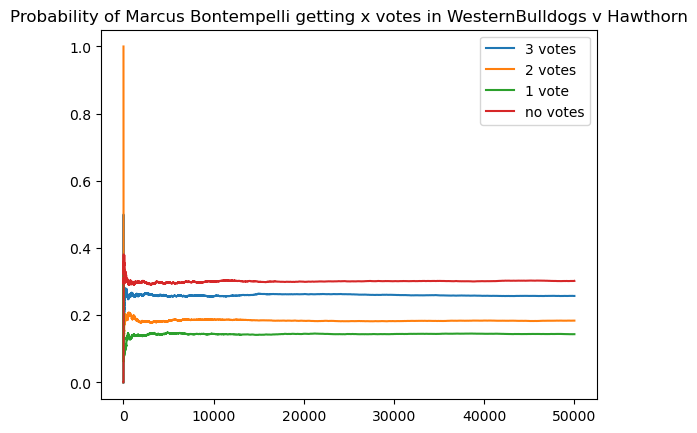

Probability of Clayton Oliver being the top player in Melbourne v Geelong is 0.2 after 10 samples
Probability of Clayton Oliver being the top player in Melbourne v Geelong is 0.35 after 100 samples
Probability of Clayton Oliver being the top player in Melbourne v Geelong is 0.298 after 1000 samples
Probability of Clayton Oliver being the top player in Melbourne v Geelong is 0.2985 after 10000 samples
Probability of Clayton Oliver being the top player in Melbourne v Geelong is 0.2998 after 20000 samples
Probability of Clayton Oliver being the top player in Melbourne v Geelong is 0.2969 after 30000 samples
Probability of Clayton Oliver being the top player in Melbourne v Geelong is 0.2988 after 40000 samples
Probability of Clayton Oliver being the top player in Melbourne v Geelong is 0.2999 after 50000 samples


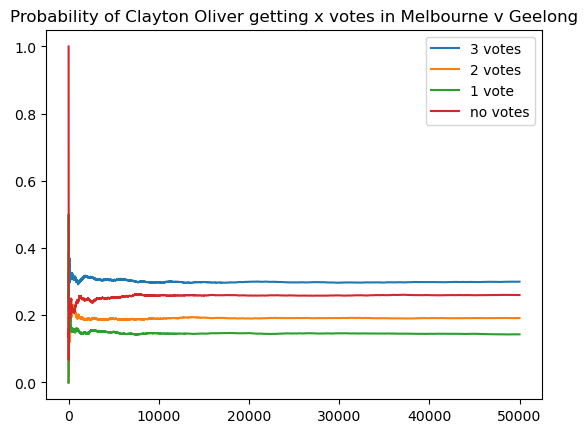

Probability of Josh Dunkley being the top player in Brisbane v GoldCoast is 0.1 after 10 samples
Probability of Josh Dunkley being the top player in Brisbane v GoldCoast is 0.2 after 100 samples
Probability of Josh Dunkley being the top player in Brisbane v GoldCoast is 0.253 after 1000 samples
Probability of Josh Dunkley being the top player in Brisbane v GoldCoast is 0.2609 after 10000 samples
Probability of Josh Dunkley being the top player in Brisbane v GoldCoast is 0.262 after 20000 samples
Probability of Josh Dunkley being the top player in Brisbane v GoldCoast is 0.2616 after 30000 samples
Probability of Josh Dunkley being the top player in Brisbane v GoldCoast is 0.2626 after 40000 samples
Probability of Josh Dunkley being the top player in Brisbane v GoldCoast is 0.2629 after 50000 samples


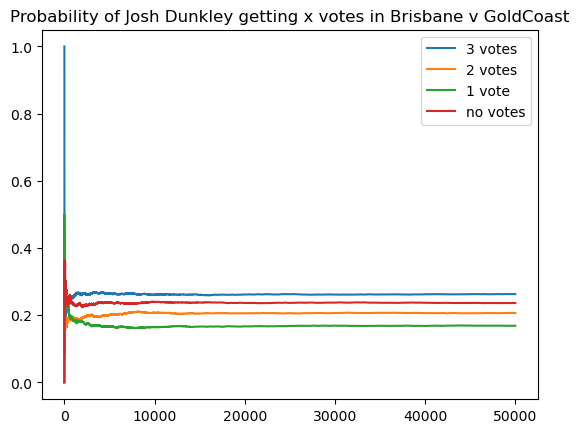

Probability of Jack Steele being the top player in Richmond v StKilda is 0.5 after 10 samples
Probability of Jack Steele being the top player in Richmond v StKilda is 0.35 after 100 samples
Probability of Jack Steele being the top player in Richmond v StKilda is 0.331 after 1000 samples
Probability of Jack Steele being the top player in Richmond v StKilda is 0.3033 after 10000 samples
Probability of Jack Steele being the top player in Richmond v StKilda is 0.3022 after 20000 samples
Probability of Jack Steele being the top player in Richmond v StKilda is 0.2981 after 30000 samples
Probability of Jack Steele being the top player in Richmond v StKilda is 0.2985 after 40000 samples
Probability of Jack Steele being the top player in Richmond v StKilda is 0.2978 after 50000 samples


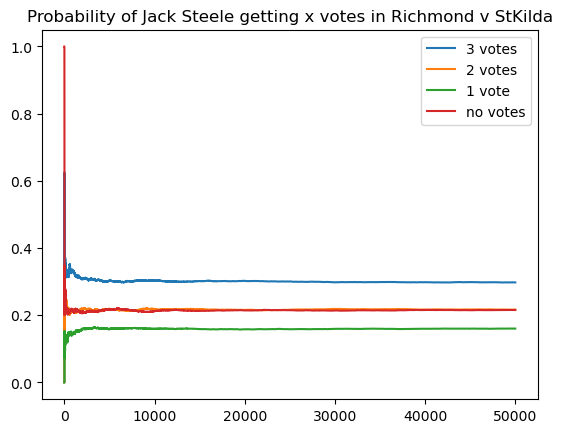

Probability of Andrew Brayshaw being the top player in Fremantle v Carlton is 0.3 after 10 samples
Probability of Andrew Brayshaw being the top player in Fremantle v Carlton is 0.33 after 100 samples
Probability of Andrew Brayshaw being the top player in Fremantle v Carlton is 0.291 after 1000 samples
Probability of Andrew Brayshaw being the top player in Fremantle v Carlton is 0.3031 after 10000 samples
Probability of Andrew Brayshaw being the top player in Fremantle v Carlton is 0.3028 after 20000 samples
Probability of Andrew Brayshaw being the top player in Fremantle v Carlton is 0.3009 after 30000 samples
Probability of Andrew Brayshaw being the top player in Fremantle v Carlton is 0.3002 after 40000 samples
Probability of Andrew Brayshaw being the top player in Fremantle v Carlton is 0.3023 after 50000 samples


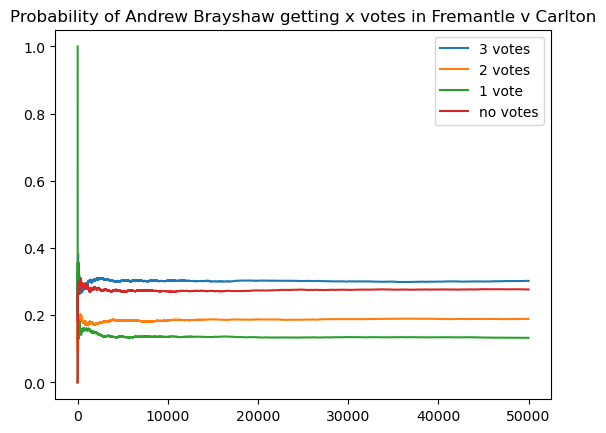

In [11]:
def simulation_stability(round_number, team1, team2, player, n_samples, all_games_simulation, **kwargs):

    player_prob = dd(list)

    total = dd(int)

    for i in range(n_samples):
        for j in range(3):
            total[j] += bool(all_games_simulation[round_number][team1 +
                                                                ' v ' + team2][str(i)].index(player) == j)
        total[3] += bool(all_games_simulation[round_number][team1 +
                                                            ' v ' + team2][str(i)].index(player) > 3)

        for j in range(4):
            player_prob[j].append(total[j]/(i+1))

        if i in [9, 99, 999, 9999, 19999, 29999, 39999, 49999, 59999, 69999, 79999, 89999, 99999]:
            print(
                f'Probability of {player} being the top player in {team1} v {team2} is {np.round(total[0]/(i+1), 4)} after {i+1} samples')

    plt.title(
        f'Probability of {player} getting x votes in {team1} v {team2}')

    for j in range(4):
        plt.plot(player_prob[j])
        plt.legend(['3 votes', '2 votes', '1 vote', 'no votes'])
    plt.show()


evaluated = 0
for round in all_games_simulation:

    for game in all_games_simulation[round]:

        data = pd.read_csv(
            f'../presentables/raw_predicted_scores/{year}_{round}_{game}.csv')

        simulation_stability(round, game.split(' v ')[0], game.split(
            ' v ')[1], data.loc[0, 'player'], n_samples, all_games_simulation)
        
        if evaluated >=10:
            break
        evaluated += 1
    if evaluated >= 10:
        break

## Collect person prob

In [9]:
leaderboard = pd.read_csv('../presentables/leaderboard.csv')
interested_players = leaderboard['Player'].head(50).tolist()

In [10]:
with open('../odds/2024_sportsbet_odds.json', 'r') as f:
    odds = json.load(f)


def straight_get_player(odds, bet_type, interested_players):
    for player in odds[bet_type]:
        interested_players.add(player)

    return interested_players


def get_combined_player(odds, bet_type, interested_players):
    for bet in odds[bet_type]:
        players = bet.split('/')
        for player in players:
            interested_players.add(player)

    return interested_players


additional_interested_players = set()

for bet_type in ['2024 AFL Brownlow Medal', 'Top 3 Finish (Includes Ineligible)', 'Top 5 Finish (Includes Ineligible)', 'Top 10 Finish (Includes Ineligible)', 'Top 20 Finish (Includes Ineligible)', 'Leader After Round 6', 'Leader After Round 10', 'Leader After Round 15', 'Most Votes Last 8 Rounds', 'Most 3 Vote Games', 'Player to Poll in the Most Games', 'Brownlow Group - Group A', 'Brownlow Group - Group B', 'Brownlow Group - Group C', 'Brownlow Group - Group D']:
    additional_interested_players = straight_get_player(
        odds, bet_type, additional_interested_players)

for bet_type in ['Brownlow Medal Quinella', 'Brownlow Medal Exacta', 'Brownlow Medal Trifecta', 'Brownlow Medal Boxed Trifecta', 'Brownlow Medal Pick4', 'Brownlow Medal Boxed Pick4']:
    additional_interested_players = get_combined_player(
        odds, bet_type, additional_interested_players)

for bet_type in ['To poll 10 or more votes', 'To poll 15 or more votes', 'To poll 20 or more votes', 'To poll 25 or more votes', 'To poll 30 or more votes', 'To Poll a Vote']:
    additional_interested_players = straight_get_player(
        odds, bet_type, additional_interested_players)

interested_players = list(
    set(interested_players).union(additional_interested_players))

len(interested_players)

254

In [14]:
# with gzip.open(f'../presentables/{year}_simulated_games.json.gz', 'rb') as f:
#     all_games_simulation = json.load(f)

In [11]:
np.random.seed(0)
all_games_player_distributions = dd(dict)

for round in tqdm(all_games_simulation):

    for game in all_games_simulation[round]:

        # indep distribution
        all_games_player_distributions[round][game] = dd(dict)

        for player in all_games_simulation[round][game][str(0)]:

            if player not in interested_players:  # get independent distribution
                player_distribution = {i: 0 for i in range(4)}

                for i in range(n_samples):
                    rank = all_games_simulation[round][game][str(
                        i)].index(player)
                    rank = rank if rank < 3 else 3
                    player_distribution[3-rank] += 1

                for i in range(4):
                    player_distribution[i] /= n_samples

                all_games_player_distributions[round][game][player] = player_distribution

        # joint distribution
        game_interested_players_index = {}
        n = 0
        for player in all_games_simulation[round][game][str(0)]:
            if player in interested_players:
                game_interested_players_index[player] = n
                n += 1

        players_distribution = dd(int)
        for i in range(n_samples):
            combo = []
            for player in game_interested_players_index:
                rank = all_games_simulation[round][game][str(i)].index(player)
                rank = rank if rank < 3 else 3
                combo.append((player, 3-rank))
            players_distribution[tuple(combo)] += 1
        for combo in players_distribution:
            players_distribution[combo] /= n_samples

        all_games_player_distributions[round][game]['joint'] = players_distribution

100%|██████████| 25/25 [02:59<00:00,  7.17s/it]


In [40]:
with open(f'../presentables/{year}_player_distributions.pickle', 'wb') as f:
    pickle.dump(all_games_player_distributions, f)

#### Research: Joint distribution stability

Probability of being the first combo in Carlton v Collingwood is 0.1 after 10 samples, 9 pos prob instances, 25
Probability of being the first combo in Carlton v Collingwood is 0.01 after 100 samples, 68 pos prob instances, 25
Probability of being the first combo in Carlton v Collingwood is 0.004 after 1000 samples, 309 pos prob instances, 25
Probability of being the first combo in Carlton v Collingwood is 0.0047 after 10000 samples, 823 pos prob instances, 25
Probability of being the first combo in Carlton v Collingwood is 0.0039 after 20000 samples, 1055 pos prob instances, 25
Probability of being the first combo in Carlton v Collingwood is 0.0035 after 30000 samples, 1185 pos prob instances, 25
Probability of being the first combo in Carlton v Collingwood is 0.0033 after 40000 samples, 1270 pos prob instances, 25
Probability of being the first combo in Carlton v Collingwood is 0.0033 after 50000 samples, 1346 pos prob instances, 25


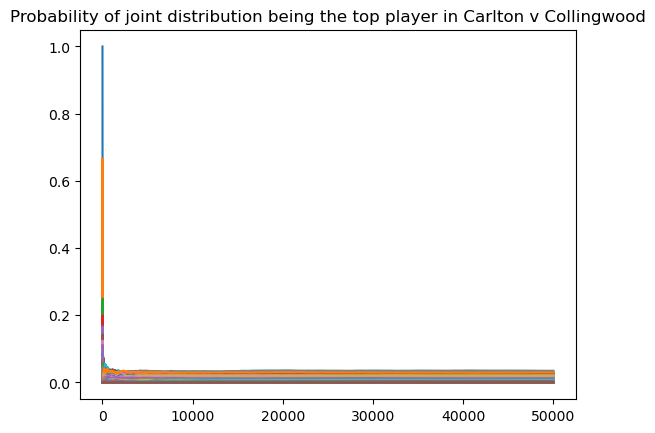

Probability of being the first combo in Sydney v GWS is 0.1 after 10 samples, 10 pos prob instances, 31
Probability of being the first combo in Sydney v GWS is 0.02 after 100 samples, 85 pos prob instances, 31
Probability of being the first combo in Sydney v GWS is 0.004 after 1000 samples, 402 pos prob instances, 31
Probability of being the first combo in Sydney v GWS is 0.0028 after 10000 samples, 932 pos prob instances, 31
Probability of being the first combo in Sydney v GWS is 0.0024 after 20000 samples, 1101 pos prob instances, 31
Probability of being the first combo in Sydney v GWS is 0.0024 after 30000 samples, 1210 pos prob instances, 31
Probability of being the first combo in Sydney v GWS is 0.0025 after 40000 samples, 1287 pos prob instances, 31
Probability of being the first combo in Sydney v GWS is 0.0024 after 50000 samples, 1352 pos prob instances, 31


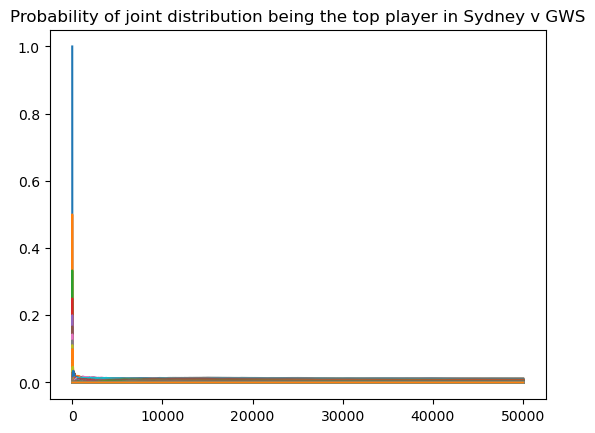

Probability of being the first combo in Richmond v Fremantle is 0.1 after 10 samples, 10 pos prob instances, 20
Probability of being the first combo in Richmond v Fremantle is 0.01 after 100 samples, 72 pos prob instances, 20
Probability of being the first combo in Richmond v Fremantle is 0.004 after 1000 samples, 235 pos prob instances, 20
Probability of being the first combo in Richmond v Fremantle is 0.0074 after 10000 samples, 502 pos prob instances, 20
Probability of being the first combo in Richmond v Fremantle is 0.0066 after 20000 samples, 591 pos prob instances, 20
Probability of being the first combo in Richmond v Fremantle is 0.0066 after 30000 samples, 636 pos prob instances, 20
Probability of being the first combo in Richmond v Fremantle is 0.0067 after 40000 samples, 670 pos prob instances, 20
Probability of being the first combo in Richmond v Fremantle is 0.0065 after 50000 samples, 698 pos prob instances, 20


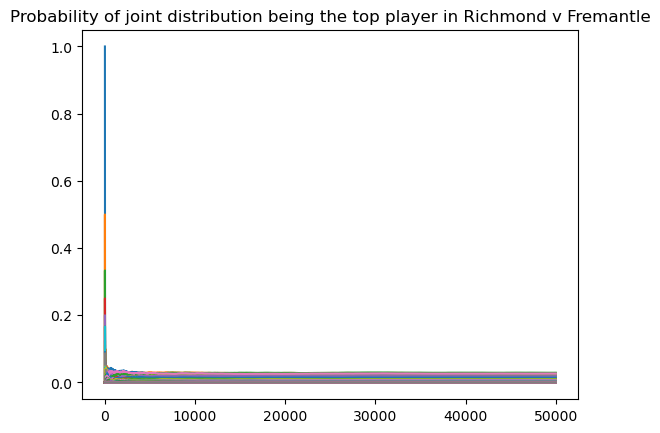

Probability of being the first combo in StKilda v NorthMelbourne is 0.1 after 10 samples, 10 pos prob instances, 21
Probability of being the first combo in StKilda v NorthMelbourne is 0.01 after 100 samples, 71 pos prob instances, 21
Probability of being the first combo in StKilda v NorthMelbourne is 0.001 after 1000 samples, 273 pos prob instances, 21
Probability of being the first combo in StKilda v NorthMelbourne is 0.0002 after 10000 samples, 705 pos prob instances, 21
Probability of being the first combo in StKilda v NorthMelbourne is 0.0001 after 20000 samples, 858 pos prob instances, 21
Probability of being the first combo in StKilda v NorthMelbourne is 0.0001 after 30000 samples, 966 pos prob instances, 21
Probability of being the first combo in StKilda v NorthMelbourne is 0.0 after 40000 samples, 1037 pos prob instances, 21
Probability of being the first combo in StKilda v NorthMelbourne is 0.0001 after 50000 samples, 1087 pos prob instances, 21


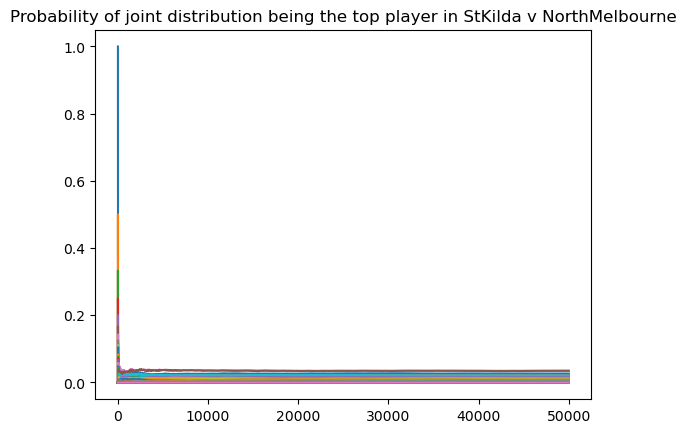

Probability of being the first combo in WestCoast v Essendon is 0.1 after 10 samples, 9 pos prob instances, 18
Probability of being the first combo in WestCoast v Essendon is 0.01 after 100 samples, 54 pos prob instances, 18
Probability of being the first combo in WestCoast v Essendon is 0.036 after 1000 samples, 119 pos prob instances, 18
Probability of being the first combo in WestCoast v Essendon is 0.0351 after 10000 samples, 209 pos prob instances, 18
Probability of being the first combo in WestCoast v Essendon is 0.0351 after 20000 samples, 241 pos prob instances, 18
Probability of being the first combo in WestCoast v Essendon is 0.0353 after 30000 samples, 267 pos prob instances, 18
Probability of being the first combo in WestCoast v Essendon is 0.0361 after 40000 samples, 283 pos prob instances, 18
Probability of being the first combo in WestCoast v Essendon is 0.0373 after 50000 samples, 302 pos prob instances, 18


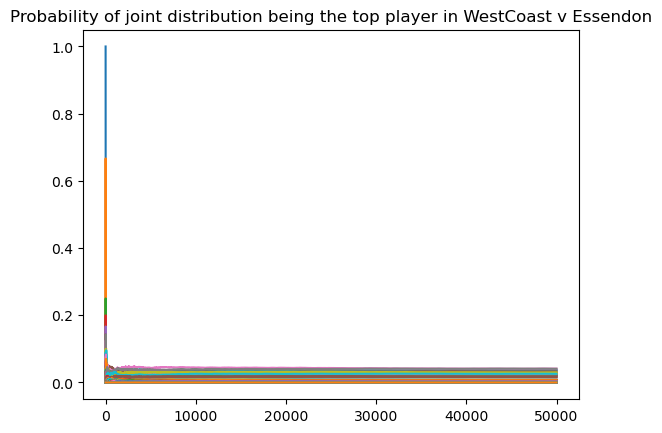

Probability of being the first combo in Adelaide v PortAdelaide is 0.1 after 10 samples, 9 pos prob instances, 25
Probability of being the first combo in Adelaide v PortAdelaide is 0.01 after 100 samples, 38 pos prob instances, 25
Probability of being the first combo in Adelaide v PortAdelaide is 0.007 after 1000 samples, 129 pos prob instances, 25
Probability of being the first combo in Adelaide v PortAdelaide is 0.0022 after 10000 samples, 250 pos prob instances, 25
Probability of being the first combo in Adelaide v PortAdelaide is 0.0016 after 20000 samples, 315 pos prob instances, 25
Probability of being the first combo in Adelaide v PortAdelaide is 0.0015 after 30000 samples, 353 pos prob instances, 25
Probability of being the first combo in Adelaide v PortAdelaide is 0.0014 after 40000 samples, 380 pos prob instances, 25
Probability of being the first combo in Adelaide v PortAdelaide is 0.0014 after 50000 samples, 399 pos prob instances, 25


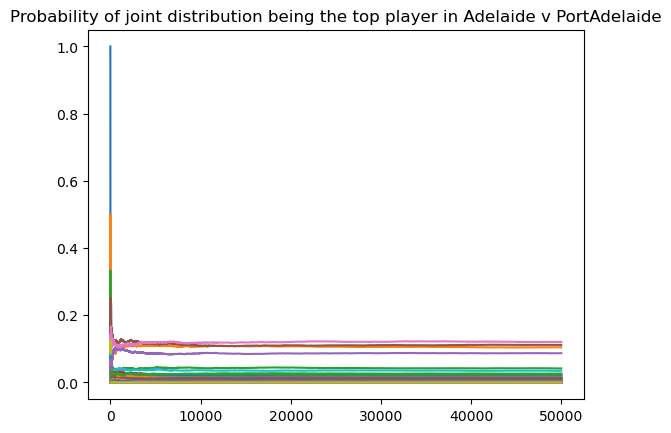

Probability of being the first combo in WesternBulldogs v Hawthorn is 0.1 after 10 samples, 10 pos prob instances, 24
Probability of being the first combo in WesternBulldogs v Hawthorn is 0.01 after 100 samples, 85 pos prob instances, 24
Probability of being the first combo in WesternBulldogs v Hawthorn is 0.003 after 1000 samples, 376 pos prob instances, 24
Probability of being the first combo in WesternBulldogs v Hawthorn is 0.0025 after 10000 samples, 783 pos prob instances, 24
Probability of being the first combo in WesternBulldogs v Hawthorn is 0.0026 after 20000 samples, 933 pos prob instances, 24
Probability of being the first combo in WesternBulldogs v Hawthorn is 0.0024 after 30000 samples, 1025 pos prob instances, 24
Probability of being the first combo in WesternBulldogs v Hawthorn is 0.0024 after 40000 samples, 1089 pos prob instances, 24
Probability of being the first combo in WesternBulldogs v Hawthorn is 0.0025 after 50000 samples, 1131 pos prob instances, 24


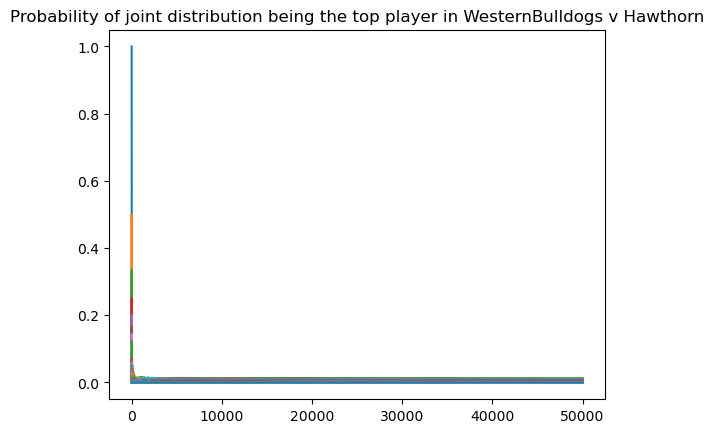

Probability of being the first combo in Melbourne v Geelong is 0.1 after 10 samples, 9 pos prob instances, 25
Probability of being the first combo in Melbourne v Geelong is 0.02 after 100 samples, 67 pos prob instances, 25
Probability of being the first combo in Melbourne v Geelong is 0.015 after 1000 samples, 252 pos prob instances, 25
Probability of being the first combo in Melbourne v Geelong is 0.015 after 10000 samples, 495 pos prob instances, 25
Probability of being the first combo in Melbourne v Geelong is 0.0152 after 20000 samples, 558 pos prob instances, 25
Probability of being the first combo in Melbourne v Geelong is 0.0155 after 30000 samples, 603 pos prob instances, 25
Probability of being the first combo in Melbourne v Geelong is 0.0153 after 40000 samples, 635 pos prob instances, 25
Probability of being the first combo in Melbourne v Geelong is 0.0151 after 50000 samples, 659 pos prob instances, 25


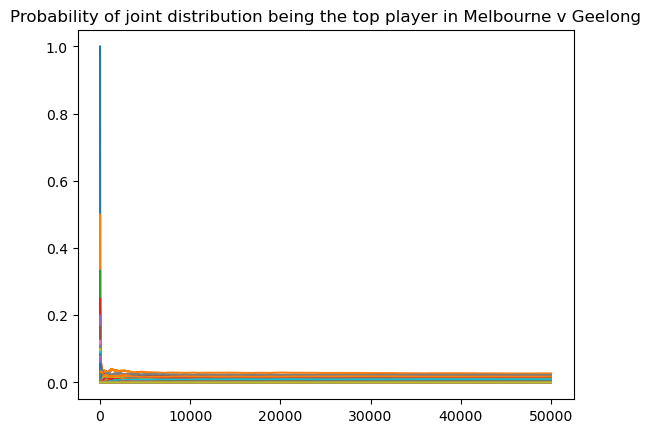

Probability of being the first combo in Brisbane v GoldCoast is 0.1 after 10 samples, 8 pos prob instances, 24
Probability of being the first combo in Brisbane v GoldCoast is 0.01 after 100 samples, 63 pos prob instances, 24
Probability of being the first combo in Brisbane v GoldCoast is 0.016 after 1000 samples, 240 pos prob instances, 24
Probability of being the first combo in Brisbane v GoldCoast is 0.013 after 10000 samples, 563 pos prob instances, 24
Probability of being the first combo in Brisbane v GoldCoast is 0.0136 after 20000 samples, 704 pos prob instances, 24
Probability of being the first combo in Brisbane v GoldCoast is 0.0135 after 30000 samples, 780 pos prob instances, 24
Probability of being the first combo in Brisbane v GoldCoast is 0.014 after 40000 samples, 846 pos prob instances, 24
Probability of being the first combo in Brisbane v GoldCoast is 0.0139 after 50000 samples, 892 pos prob instances, 24


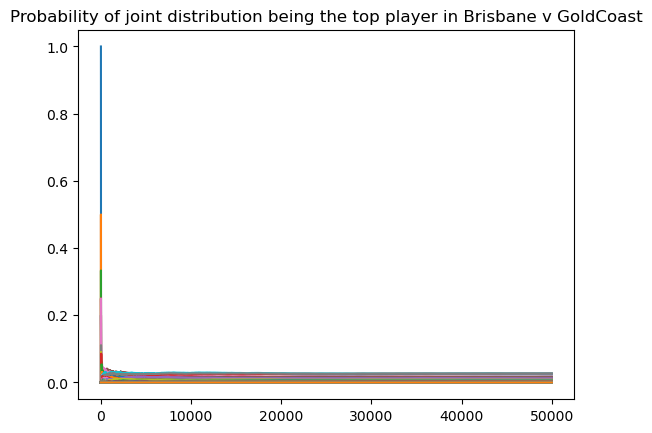

Probability of being the first combo in Richmond v StKilda is 0.1 after 10 samples, 9 pos prob instances, 17
Probability of being the first combo in Richmond v StKilda is 0.01 after 100 samples, 60 pos prob instances, 17
Probability of being the first combo in Richmond v StKilda is 0.003 after 1000 samples, 188 pos prob instances, 17
Probability of being the first combo in Richmond v StKilda is 0.0023 after 10000 samples, 408 pos prob instances, 17
Probability of being the first combo in Richmond v StKilda is 0.0022 after 20000 samples, 477 pos prob instances, 17
Probability of being the first combo in Richmond v StKilda is 0.0021 after 30000 samples, 525 pos prob instances, 17
Probability of being the first combo in Richmond v StKilda is 0.002 after 40000 samples, 551 pos prob instances, 17
Probability of being the first combo in Richmond v StKilda is 0.0021 after 50000 samples, 572 pos prob instances, 17


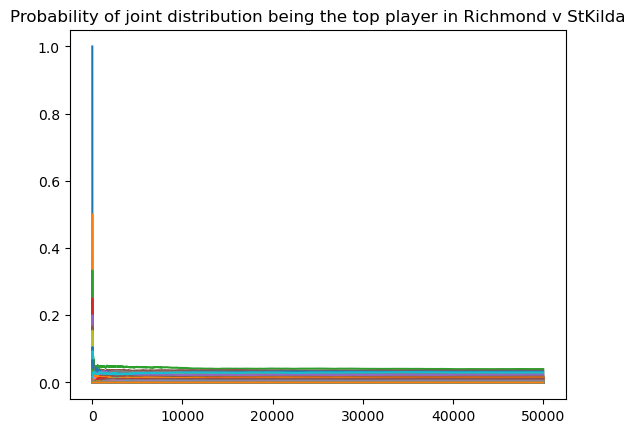

Probability of being the first combo in Fremantle v Carlton is 0.1 after 10 samples, 9 pos prob instances, 28
Probability of being the first combo in Fremantle v Carlton is 0.01 after 100 samples, 85 pos prob instances, 28
Probability of being the first combo in Fremantle v Carlton is 0.001 after 1000 samples, 492 pos prob instances, 28
Probability of being the first combo in Fremantle v Carlton is 0.0004 after 10000 samples, 1431 pos prob instances, 28
Probability of being the first combo in Fremantle v Carlton is 0.0002 after 20000 samples, 1774 pos prob instances, 28
Probability of being the first combo in Fremantle v Carlton is 0.0002 after 30000 samples, 1984 pos prob instances, 28
Probability of being the first combo in Fremantle v Carlton is 0.0002 after 40000 samples, 2119 pos prob instances, 28
Probability of being the first combo in Fremantle v Carlton is 0.0002 after 50000 samples, 2238 pos prob instances, 28


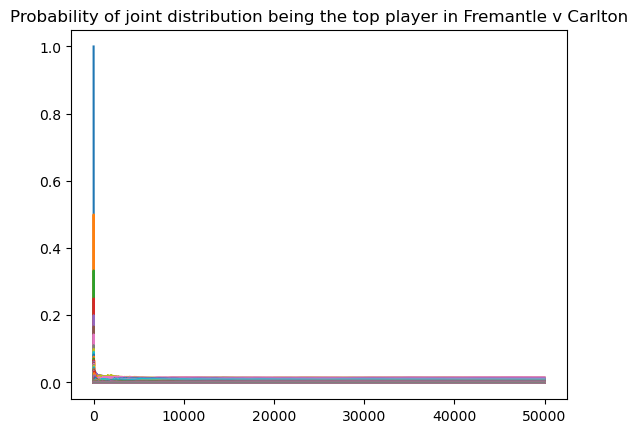

In [17]:
def simulation_stability_joint(round_number, team1, team2, n_samples, all_games_simulation, **kwargs):

    player_prob = dd(list)

    game_interested_players_index = {}
    n = 0
    for player in all_games_simulation[round][game][str(0)]:
        if player in interested_players:
            game_interested_players_index[player] = n
            n += 1

    total = dd(int)

    for i in range(n_samples):

        combo = []
        for player in game_interested_players_index:
            rank = all_games_simulation[round][game][str(i)].index(player)
            rank = rank if rank < 3 else 3
            combo.append((player, 3-rank))
        total[tuple(combo)] += 1

        if tuple(combo) not in player_prob:
            player_prob[tuple(combo)] = [0 for _ in range(i)]
        player_prob[tuple(combo)].append(total[tuple(combo)]/(i+1))

        for other_combo in player_prob:
            if other_combo != tuple(combo):
                player_prob[tuple(other_combo)].append(
                    player_prob[tuple(other_combo)][-1] * i / (i+1))

        if i in [9, 99, 999, 9999, 19999, 29999, 39999, 49999, 59999, 69999, 79999, 89999, 99999]:
            print(
                f'Probability of being the first combo in {team1} v {team2} is {np.round(total[list(total.keys())[0]]/(i+1), 4)} after {i+1} samples, {len(total)} pos prob instances, {len(game_interested_players_index)}')

    plt.title(
        f'Probability of joint distribution being the top player in {team1} v {team2}')

    for combo in player_prob:
        plt.plot(player_prob[combo])
    plt.show()

evaluated = 0
for round in all_games_simulation:

    for game in all_games_simulation[round]:

        data = pd.read_csv(
            f'../presentables/raw_predicted_scores/{year}_{round}_{game}.csv')

        simulation_stability_joint(round, game.split(' v ')[0], game.split(
            ' v ')[1], n_samples, all_games_simulation)
        
        if evaluated >= 10:
            break
        evaluated += 1
    if evaluated >= 10:
        break

# Odds

In [12]:
banned = ['Issac Heeney', 'Dan Houston', 'Izak Rankine']
n_sample_season = 100000

In [13]:
import time

In [14]:
used_time = 0

overall_start_time = time.time()
np.random.seed(0)
simulation_result = dd(list)
game_by_game_simulation_result = dict()

for _ in tqdm(range(n_sample_season)):
    game_by_game_simulation_result[_] = dict()
    overall_tally = {'overall': dd(int), 'Leader After Round 6': dd(int), 'Leader After Round 10': dd(int), 'Leader After Round 15': dd(int), 'Most Votes Last 8 Rounds': dd(int), 'Most 3 Vote Games': dd(int), 'Player to Poll in the Most Games': dd(int)}

    # record stats for the season
    for round_i in range(25):
        game_by_game_simulation_result[_][f'round{round_i}'] = dict()
        round = f'round{round_i}'
        for game in all_games_player_distributions[round]:
            game_by_game_simulation_result[_][f'round{round_i}'][game] = dict()
            
            start_time = time.time()
            sampled_combo = np.random.choice(
                range(len(all_games_player_distributions[round][game]['joint'])), p=list(all_games_player_distributions[round][game]['joint'].values()))
            end_time = time.time()
            used_time += end_time - start_time

            sampled_votes = list(all_games_player_distributions[round][game]['joint'].keys())[sampled_combo]

            for player in sampled_votes:
                overall_tally['overall'][player[0]] += player[1]

                if player[1] > 0:
                    game_by_game_simulation_result[_][f'round{round_i}'][game][player[0]] = player[1]

                if round_i <= 15:
                    overall_tally['Leader After Round 15'][player[0]] += player[1]
                if round_i <= 10:
                    overall_tally['Leader After Round 10'][player[0]] += player[1]
                if round_i <= 6:
                    overall_tally['Leader After Round 6'][player[0]] += player[1]
                if round_i >= 17:
                    overall_tally['Most Votes Last 8 Rounds'][player[0]] += player[1]

                if player[1] == 3:
                    overall_tally['Most 3 Vote Games'][player[0]] += 1
                if player[1] >= 1:
                    overall_tally['Player to Poll in the Most Games'][player[0]] += 1

            # independent
            for player in all_games_player_distributions[round][game]:

                if player == 'joint':
                    continue
                elif all_games_player_distributions[round][game][player][0] >= 0.99: # ignore those who have less than 1% chance of getting a vote
                    continue
                start_time = time.time()
                sampled_rank = np.random.choice(
                    range(4), p=list(all_games_player_distributions[round][game][player].values()))
                end_time = time.time()
                used_time += end_time - start_time
                overall_tally['overall'][player] += sampled_rank

                if sampled_rank > 0:
                    game_by_game_simulation_result[_][f'round{round_i}'][game][player] = sampled_rank

                if round_i <= 15:
                    overall_tally['Leader After Round 15'][player] += sampled_rank
                if round_i <= 10:
                    overall_tally['Leader After Round 10'][player] += sampled_rank
                if round_i <= 6:
                    overall_tally['Leader After Round 6'][player] += sampled_rank
                if round_i >= 17:
                    overall_tally['Most Votes Last 8 Rounds'][player] += sampled_rank

                if sampled_rank == 3:
                    overall_tally['Most 3 Vote Games'][player] += 1
                if sampled_rank >= 1:
                    overall_tally['Player to Poll in the Most Games'][player] += 1


    # TOP 1, 3, 5, 10, 20
    sorted_votes = {'overall': sorted(overall_tally['overall'].items(), key=lambda x: x[1], reverse=True)}
    sorted_votes['group_A'] = [player for player in sorted_votes['overall'] if player[0] in odds['Brownlow Group - Group A']]
    sorted_votes['group_B'] = [player for player in sorted_votes['overall'] if player[0] in odds['Brownlow Group - Group B']]
    sorted_votes['group_C'] = [player for player in sorted_votes['overall'] if player[0] in odds['Brownlow Group - Group C']]
    sorted_votes['group_D'] = [player for player in sorted_votes['overall'] if player[0] in odds['Brownlow Group - Group D']]

    rank_threshold = {}
    for i in (1, 2, 3, 4, 5, 10, 20):
        rank_threshold[i] = sorted_votes['overall'][i-1][1]
        if i == 1 and sorted_votes['overall'][i-1][0] in banned:
            cont = True
            while cont:
                i += 1
                if sorted_votes['overall'][i-1][0] not in banned:
                    cont = False
                    rank_threshold[i] = sorted_votes['overall'][i-1][1]
                else:
                    pass

    winner = []
    for player in odds['2024 AFL Brownlow Medal']:
        
        won = int(overall_tally['overall'][player] >= rank_threshold[1])

        simulation_result[f'2024 AFL Brownlow Medal: {player}'].append(won)
        
        if won:
            winner.append(player)
            
    for player in winner:
        simulation_result[f'2024 AFL Brownlow Medal: {player}'][-1] = 1/len(winner)

    for i in (3, 5, 10, 20):
        for player in odds[f'Top {i} Finish (Includes Ineligible)']:
            simulation_result[f'Top {i} Finish (Includes Ineligible): {player}'].append(int(overall_tally['overall'][player] >= rank_threshold[i]))
    

    # BOXED TRIFECTA, QUINELLA, PICK4
    index = {'Brownlow Medal Quinella':2, 'Brownlow Medal Boxed Trifecta': 3, 'Brownlow Medal Boxed Pick4':4}
    for bet in ['Brownlow Medal Quinella', 'Brownlow Medal Boxed Trifecta', 'Brownlow Medal Boxed Pick4']:

        winner = []
        for outcome in odds[bet]:
            players = outcome.split('/')
            
            won = True
            for player in players:
                if overall_tally['overall'][player] < rank_threshold[index[bet]]:
                    won = False
                    break
            
            simulation_result[f'{bet}: {outcome}'].append(int(won))

            if won:
                winner.append(outcome)

        # NOTE: we've underestimated dead heat probability - because dead heat minimum odds is 1, not 0.5 * real odds - 1
        for player in winner:
            simulation_result[f'{bet}: {player}'][-1] = 1/len(winner) 
        

    # LEADER AFTER...
    for bet in ['Leader After Round 6', 'Leader After Round 10', 'Leader After Round 15', 'Most Votes Last 8 Rounds']:
        sorted_votes[bet] = sorted(overall_tally[bet].items(), key=lambda x: x[1], reverse=True)
        threshold = sorted_votes[bet][0][1]
        winner = []
        for player in odds[bet]:
            won = int(overall_tally[bet][player] >= threshold)
            simulation_result[f'{bet}: {player}'].append(won)

            if won:
                winner.append(player)
        
        for player in winner:
            simulation_result[f'{bet}: {player}'][-1] = 1/len(winner)


    # GROUP A B C D
    for group in ['A', 'B', 'C', 'D']:
        group_winner = []
        group_first_rank_threshold = sorted_votes[f'group_{group}'][0][1]
        for player in odds[f'Brownlow Group - Group {group}']:
            won = int(overall_tally['overall'][player] >= group_first_rank_threshold)

            simulation_result[f'Brownlow Group - Group {group}: {player}'].append(won)

            if won:
                group_winner.append(player)

        for player in group_winner:
            simulation_result[f'Brownlow Group - Group {group}: {player}'][-1] = 1/len(group_winner)


    # MOST 3 VOTE GAMES, MOST GAMES POLLED
    for bet in ['Most 3 Vote Games', 'Player to Poll in the Most Games']:
        sorted_votes[bet] = sorted(overall_tally[bet].items(), key=lambda x: x[1], reverse=True)
        threshold = sorted_votes[bet][0][1]
        winner = []
        for player in odds[bet]:
            won = int(overall_tally[bet][player] >= threshold)
            simulation_result[f'{bet}: {player}'].append(won)

            if won:
                winner.append(player)
        
        # dead heat
        for player in winner:
            simulation_result[f'{bet}: {player}'][-1] = 1/len(winner)


    # TIE FIRST
    winner_id = 0
    while sorted_votes['overall'][winner_id][0] in banned:
        winner_id += 1
    second_id = winner_id + 1
    while sorted_votes['overall'][second_id][0] in banned:
        second_id += 1
    for outcome in odds['Will there be a tie in 2024?']:
        simulation_result[f'Will there be a tie in 2024?: {outcome}'].append(int(sorted_votes['overall'][winner_id][1] == sorted_votes['overall'][second_id][1]) if 'yes' in outcome.lower() else int(sorted_votes['overall'][winner_id][1] != sorted_votes['overall'][second_id][1]))


    # WINNING MARGIN
    for outcome in odds['Winning Margin']:
        if outcome == 'Tie':
            continue
        if outcome == '11+ votes':
            margin_min = 11
            margin_max = np.inf
        else:
            margin_min = int(outcome.split(' ')[0])
            margin_max = int(outcome.split(' ')[2])

        simulation_result[f'Winning Margin: {outcome}'].append(int(sorted_votes['overall'][winner_id][1] - sorted_votes['overall'][second_id][1] <= margin_max and sorted_votes['overall'][winner_id][1] - sorted_votes['overall'][second_id][1] >= margin_min))
    

    # HANDICAP MARGIN
    overall_tally['handicap'] = overall_tally['overall'].copy()
    for outcome in odds['Elite Player Handicap']:
        
        player = ' '.join(outcome.split(' ')[:2])
        handicap = float(outcome.split(' ')[-1].strip('(+)'))

        overall_tally['handicap'][player] += handicap

    sorted_votes['handicap'] = sorted(overall_tally['handicap'].items(), key=lambda x: x[1], reverse=True)
    rank_threshold[1] = sorted_votes['handicap'][0][1]
    winner = []
    for player_votes in odds['Elite Player Handicap']:
        player = ' '.join(player_votes.split(' ')[:2])
        handicap = player_votes.split(' ')[-1]
        won = int(overall_tally['handicap'][player] >= rank_threshold[1])
        simulation_result[f'Elite Player Handicap: {player} {handicap}'].append(won)
        
        if won:
            winner.append((player, handicap))
    
    for player, handicap in winner:
        simulation_result[f'Elite Player Handicap: {player} {handicap}'][-1] = 1/len(winner)


    # N OR MORE VOTES
    for bet in ['To poll 10 or more votes', 'To poll 15 or more votes', 'To poll 20 or more votes', 'To poll 25 or more votes', 'To poll 30 or more votes']:
        vote = int(bet.split(' ')[-4])

        for player in odds[bet]:
            simulation_result[f'{bet}: {player}'].append(int(overall_tally['overall'][player] >= vote))


    # ONE OR MORE VOTES
    for player in odds['To Poll a Vote']:
        simulation_result[f'To Poll a Vote: {player}'].append(int(overall_tally['overall'][player] >= 1))

overall_end_time = time.time()
overall_used_time = overall_end_time - overall_start_time

100%|██████████| 100000/100000 [45:33<00:00, 36.58it/s] 


In [15]:
# get time taken for sampling
print(f'Proportion of time taken for sampling: {used_time/overall_used_time * 100} %')

Proportion of time taken for sampling: 67.21500120572995 %


In [16]:
simulated_results_df = pd.DataFrame(simulation_result)

simulated_prob = simulated_results_df.mean()

In [17]:
# save the simulated results dataframe
simulated_results_df.to_parquet(f'../presentables/{year}_simulated_results.parquet')

# save the simulated results
with open(f'../presentables/{year}_game_by_game_simulation_result.pickle', 'wb') as f:
    pickle.dump(game_by_game_simulation_result, f)

In [28]:
# get the return correlation matrix

return_df = simulated_results_df.copy()

for column in simulated_results_df.columns:
    player = column.split(': ')[1]
    bet_type = column.split(': ')[0]

    bet_odds = odds[bet_type][player]
    return_df[column] = return_df[column].apply(lambda x: bet_odds if x == 1 else -1 if 0 else max(1, x * bet_odds)) # account for dead heat

simulated_cov = return_df.cov()

In [29]:
odds_df = pd.DataFrame({'p': simulated_prob})
odds_df['var'] = odds_df['p']*(1-odds_df['p'])/n_sample_season
odds_df['lower_bound_p'] = odds_df['p']-2*np.sqrt(odds_df['var'])

for i in (0.05, 0.1, 0.2):
    odds_df['lower_p_safety_margin_'+str(i)] = odds_df['p']-i

In [30]:
# check those with 0 simulated probability
odds_df[odds_df['p'] == 0]

,p,var,lower_bound_p,lower_p_safety_margin_0.05,lower_p_safety_margin_0.1,lower_p_safety_margin_0.2
Brownlow Medal Quinella: Jason H-Francis/Patrick Cripps,0.0,0.0,0.0,-0.05,-0.1,-0.2
Brownlow Medal Boxed Trifecta: Jason H-Francis/Lachie Neale/Patrick Cripps,0.0,0.0,0.0,-0.05,-0.1,-0.2
Brownlow Medal Boxed Trifecta: Jason H-Francis/Nick Daicos/Zachary Merrett,0.0,0.0,0.0,-0.05,-0.1,-0.2
Brownlow Medal Boxed Pick4: Errol Gulden/Jason H-Francis/Nick Daicos/Patrick Cripps,0.0,0.0,0.0,-0.05,-0.1,-0.2
Brownlow Medal Boxed Pick4: Jason H-Francis/Lachie Neale/Marcus Bontempelli/Patrick Cripps,0.0,0.0,0.0,-0.05,-0.1,-0.2
Brownlow Medal Boxed Pick4: Chad Warner/Jason H-Francis/Nick Daicos/Patrick Cripps,0.0,0.0,0.0,-0.05,-0.1,-0.2
Brownlow Medal Boxed Pick4: Caleb Serong/Jason H-Francis/Lachie Neale/Patrick Cripps,0.0,0.0,0.0,-0.05,-0.1,-0.2
Brownlow Medal Boxed Pick4: Jason H-Francis/Nick Daicos/Noah Anderson/Patrick Cripps,0.0,0.0,0.0,-0.05,-0.1,-0.2
Leader After Round 6: Alex Pearce,0.0,0.0,0.0,-0.05,-0.1,-0.2
To poll 30 or more votes: Chad Warner,0.0,0.0,0.0,-0.05,-0.1,-0.2


In [31]:
official_odds = []

for bet in odds_df.index:
    player = bet.split(': ')[1]
    bet_type = bet.split(': ')[0]

    official_odds.append(odds[bet_type][player])

In [32]:
odds_df['official_odds'] = official_odds

odds_df['return'] = ((odds_df['official_odds']-1)/1)*odds_df['p'] + (-1/1) * (1-odds_df['p'])
odds_df['lower_bound_return'] = (odds_df['official_odds']-1)*odds_df['lower_bound_p'] - 1 * (1-odds_df['lower_bound_p'])
for i in (0.05, 0.1, 0.2):
    odds_df['return_safety_margin_'+str(i)] = (odds_df['official_odds']-1)*odds_df['lower_p_safety_margin_'+str(i)] - 1 * (1-odds_df['lower_p_safety_margin_'+str(i)])

In [38]:
odds_df.to_csv(f'../presentables/{year}_odds_df.csv')

In [33]:
def get_positive_return_data(odds_df, simulated_corr, prob_type, filter = True):

    if filter:
        positive_return_data =  odds_df[odds_df[prob_type] > 0]
    else:
        positive_return_data = odds_df
    positive_return_bets = positive_return_data.index
    positive_return_Er = positive_return_data[prob_type].values
    positive_return_corr = simulated_corr.loc[positive_return_bets, positive_return_bets].values

    return positive_return_bets, positive_return_Er, positive_return_corr

portfolio_data = {'lower_bound_return': {}, 'return_safety_margin_0.05': {}, 'return_safety_margin_0.1': {}, 'return_safety_margin_0.2': {}}

for prob_type in ['lower_bound_return', 'return_safety_margin_0.05', 'return_safety_margin_0.1', 'return_safety_margin_0.2']:
    positive_return_bets, positive_return_Er, positive_return_corr = get_positive_return_data(odds_df, simulated_cov, prob_type)
    portfolio_data[prob_type]['bets'] = positive_return_bets
    portfolio_data[prob_type]['Er'] = positive_return_Er
    portfolio_data[prob_type]['cov'] = positive_return_corr

unfiltered_portfolio_data = {'lower_bound_return': {}, 'return_safety_margin_0.05': {}, 'return_safety_margin_0.1': {}, 'return_safety_margin_0.2': {}}
for prob_type in ['lower_bound_return', 'return_safety_margin_0.05', 'return_safety_margin_0.1', 'return_safety_margin_0.2']:
    positive_return_bets, positive_return_Er, positive_return_corr = get_positive_return_data(odds_df, simulated_cov, prob_type, filter = False)
    unfiltered_portfolio_data[prob_type]['bets'] = positive_return_bets
    unfiltered_portfolio_data[prob_type]['Er'] = positive_return_Er
    unfiltered_portfolio_data[prob_type]['cov'] = positive_return_corr

In [34]:
import numpy as np
from scipy.optimize import minimize

def portfolio_optimization(mean_returns, cov_matrix, risk_free_rate=0.0, method='max_sharpe'):
    """
    Perform portfolio optimization to either maximize the Sharpe ratio or minimize volatility.
    
    Parameters:
    - mean_returns: A numpy array of mean returns for each asset.
    - cov_matrix: A covariance matrix of asset returns.
    - risk_free_rate: The risk-free rate, default is 0.0.
    - method: Optimization method, 'max_sharpe' to maximize Sharpe ratio or 'min_volatility' to minimize volatility.
    
    Returns:
    - optimal_weights: The optimal asset weights for the portfolio.
    - optimal_return: The expected return of the optimized portfolio.
    - optimal_volatility: The volatility of the optimized portfolio.
    - optimal_sharpe: The Sharpe ratio of the optimized portfolio.
    """
    
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    
    def portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate):
        portfolio_return = np.sum(weights * mean_returns)
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
        return portfolio_return, portfolio_volatility, sharpe_ratio
    
    def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
        return -portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate)[2]
    
    def portfolio_volatility(weights, mean_returns, cov_matrix, risk_free_rate):
        return portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate)[1]
    
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for _ in range(num_assets))
    initial_guess = num_assets * [1. / num_assets,]
    
    if method == 'max_sharpe':
        result = minimize(neg_sharpe_ratio, initial_guess, args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    elif method == 'min_volatility':
        result = minimize(portfolio_volatility, initial_guess, args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    else:
        raise ValueError("Invalid method. Use 'max_sharpe' or 'min_volatility'.")
    
    optimal_weights = result.x
    optimal_return, optimal_volatility, optimal_sharpe = portfolio_performance(optimal_weights, mean_returns, cov_matrix, risk_free_rate)
    
    return optimal_weights, optimal_return, optimal_volatility, optimal_sharpe

In [40]:
# Example usage:
margin_type = 'return_safety_margin_0.2'

mean_returns = portfolio_data[margin_type]['Er']
cov_matrix = portfolio_data[margin_type]['cov']
bet = portfolio_data[margin_type]['bets']
risk_free_rate = 0.049
optimal_weights, optimal_return, optimal_volatility, optimal_sharpe = portfolio_optimization(mean_returns, cov_matrix, risk_free_rate, method='max_sharpe')
display("Optimal Weights:", {bet[i]: np.round(100*optimal_weights[i], 2) for i in range(len(bet))})
print("Expected Return:", 100*optimal_return, "%")
print("Volatility:", 100*optimal_volatility, '%')
print("Sharpe Ratio:", optimal_sharpe)
print("number of bets:", len(bet))

'Optimal Weights:'

{'Top 3 Finish (Includes Ineligible): Marcus Bontempelli': 0.13,
 'Top 3 Finish (Includes Ineligible): Zak Butters': 0.0,
 'Top 5 Finish (Includes Ineligible): Zak Butters': 0.1,
 'Top 10 Finish (Includes Ineligible): Rowan Marshall': 0.09,
 'Top 10 Finish (Includes Ineligible): Max Gawn': 0.02,
 'Top 10 Finish (Includes Ineligible): Lachie Whitfield': 0.0,
 'Top 20 Finish (Includes Ineligible): Max Gawn': 1.85,
 'Top 20 Finish (Includes Ineligible): Rowan Marshall': 1.78,
 'Top 20 Finish (Includes Ineligible): Lachie Whitfield': 0.39,
 'Top 20 Finish (Includes Ineligible): Harry Sheezel': 0.34,
 'Top 20 Finish (Includes Ineligible): Josh Dunkley': 0.11,
 'Top 20 Finish (Includes Ineligible): Jack Steele': 0.16,
 'Top 20 Finish (Includes Ineligible): Jack Sinclair': 0.11,
 'Top 20 Finish (Includes Ineligible): Sam Flanders': 0.12,
 'Top 20 Finish (Includes Ineligible): Dayne Zorko': 0.05,
 'Top 20 Finish (Includes Ineligible): Rory Laird': 0.0,
 'Brownlow Group - Group A: Adam Treloar'

Expected Return: 68.25434297472042 %
Volatility: 9.860278513968419 %
Sharpe Ratio: 6.425208262116573
number of bets: 80


In [43]:
bets_portfolio_dict = {bet[i]: np.round(100*optimal_weights[i], 2) for i in range(len(bet))}
bets_portfolio_df = pd.DataFrame(bets_portfolio_dict, index = [0]).T
bets_portfolio_df.to_csv(f'../presentables/{year}_portfolio_{margin_type}.csv')

In [36]:
# Example usage:
margin_type = 'return_safety_margin_0.2'

mean_returns = unfiltered_portfolio_data[margin_type]['Er']
cov_matrix = unfiltered_portfolio_data[margin_type]['cov']
bet = unfiltered_portfolio_data[margin_type]['bets']
risk_free_rate = 0.049
optimal_weights, optimal_return, optimal_volatility, optimal_sharpe = portfolio_optimization(mean_returns, cov_matrix, risk_free_rate, method='max_sharpe')
display("Optimal Weights:", {bet[i]: np.round(100*optimal_weights[i], 2) for i in range(len(bet))})
print("Expected Return:", 100*optimal_return, "%")
print("Volatility:", 100*optimal_volatility, '%')
print("Sharpe Ratio:", optimal_sharpe)
print("number of bets:", len(bet))

'Optimal Weights:'

{'2024 AFL Brownlow Medal: Patrick Cripps': 0.0,
 '2024 AFL Brownlow Medal: Nick Daicos': 0.0,
 '2024 AFL Brownlow Medal: Lachie Neale': 0.0,
 '2024 AFL Brownlow Medal: Marcus Bontempelli': 0.0,
 '2024 AFL Brownlow Medal: Zachary Merrett': 0.0,
 '2024 AFL Brownlow Medal: Caleb Serong': 0.0,
 '2024 AFL Brownlow Medal: Errol Gulden': 0.0,
 '2024 AFL Brownlow Medal: Tom Green': 0.0,
 '2024 AFL Brownlow Medal: Zak Butters': 0.0,
 '2024 AFL Brownlow Medal: Adam Treloar': 0.0,
 '2024 AFL Brownlow Medal: Chad Warner': 0.0,
 '2024 AFL Brownlow Medal: Jason H-Francis': 0.0,
 '2024 AFL Brownlow Medal: Noah Anderson': 0.0,
 '2024 AFL Brownlow Medal: Jai Newcombe': 0.0,
 '2024 AFL Brownlow Medal: Matt Rowell': 0.0,
 'Top 3 Finish (Includes Ineligible): Nick Daicos': 0.0,
 'Top 3 Finish (Includes Ineligible): Patrick Cripps': 0.0,
 'Top 3 Finish (Includes Ineligible): Lachie Neale': 0.0,
 'Top 3 Finish (Includes Ineligible): Isaac Heeney': 0.0,
 'Top 3 Finish (Includes Ineligible): Marcus Bontempel

Expected Return: 70.3695534331143 %
Volatility: 10.215405083329884 %
Sharpe Ratio: 6.40890428710962
number of bets: 843


In [37]:
# filtered out some bets manually
retained_bets = {'Top 3 Finish (Includes Ineligible): Marcus Bontempelli': 0.33,
 'Top 3 Finish (Includes Ineligible): Zak Butters': 0.0,
 'Top 5 Finish (Includes Ineligible): Zak Butters': 0.38,
 'Top 10 Finish (Includes Ineligible): Rowan Marshall': 0.6,
 'Top 10 Finish (Includes Ineligible): Max Gawn': 0.26,
 'Top 10 Finish (Includes Ineligible): Lachie Whitfield': 0.0,
 'Top 20 Finish (Includes Ineligible): Max Gawn': 0.0,
 'Top 20 Finish (Includes Ineligible): Rowan Marshall': 0.27,
 'Top 20 Finish (Includes Ineligible): Lachie Whitfield': 1.12,
 'Top 20 Finish (Includes Ineligible): Harry Sheezel': 1.31,
 'Top 20 Finish (Includes Ineligible): Josh Dunkley': 0.43,
 'Top 20 Finish (Includes Ineligible): Jack Steele': 0.64,
 'Top 20 Finish (Includes Ineligible): Jack Sinclair': 0.43,
 'Top 20 Finish (Includes Ineligible): Sam Flanders': 0.5,
 'Top 20 Finish (Includes Ineligible): Dayne Zorko': 0.22,
 'Top 20 Finish (Includes Ineligible): Rory Laird': 0.05,
 'Brownlow Group - Group D: Jack Steele': 0.0,
 'To poll 10 or more votes: Rory Laird': 0.71,
 'To poll 10 or more votes: Brodie Grundy': 1.43,
 'To poll 10 or more votes: Luke Ryan': 2.08,
 'To poll 10 or more votes: Dan Houston': 0.41,
 'To poll 10 or more votes: Jordan Clark': 0.68,
 'To poll 10 or more votes: Tristan Xerri': 4.06,
 'To Poll a Vote: Toby Nankervis': 0.0,
 'To Poll a Vote: Timothy English': 0.28,
 'To Poll a Vote: Jarrod Berry': 0.3,
 'To Poll a Vote: Tom Powell': 3.79,
 'To Poll a Vote: Matthew Kennedy': 0.13,
 'To Poll a Vote: Matthew Roberts': 5.95,
 'To Poll a Vote: Lloyd Meek': 11.69,
 'To Poll a Vote: Harrison Himmelberg': 6.75,
 'To Poll a Vote: Bailey Scott': 0.91,
 'To Poll a Vote: Jeremy Howe': 1.61, 
 'To Poll a Vote: Bailey Williams': 0.2,
 'To Poll a Vote: Lachlan Bramble': 0.82,
 'To Poll a Vote: Jordon Sweet': 8.23,
 'To Poll a Vote: Rhys Stanley': 0.9,
 'To Poll a Vote: Ivan Soldo': 0.98,
 'To Poll a Vote: Dylan Shiel': 2.23, 
 'To Poll a Vote: Dyson Heppell': 2.0,
 'To Poll a Vote: Jack Billings': 0.07,
 'To Poll a Vote: Alex Sexton': 0.12, 
 'To Poll a Vote: Nick Hind': 1.15,
 'To Poll a Vote: Joel Freijah': 0.55,
 'To Poll a Vote: Jake Lloyd': 1.86,
 'To Poll a Vote: Darcy Tucker': 1.05,
 'To Poll a Vote: Jayden Laverde': 1.18,
 'To Poll a Vote: Mark Keane': 1.93} 


# Ensure that 'bet' is a list
bet_list = list(bet) if not isinstance(bet, list) else bet

# Extracting the bet names from retained_bets
retained_bet_names = list(retained_bets.keys())

# Get the indexes of the retained bets from the 'bet_list'
# Ensure each retained bet is present in 'bet_list' before retrieving the index
retained_bets_index = [bet_list.index(b) for b in retained_bet_names if b in bet_list]

# Update mean_returns and covariance_matrix using the retained indices
mean_returns = mean_returns[retained_bets_index]
cov_matrix = cov_matrix[np.ix_(retained_bets_index, retained_bets_index)]

# Update the bet list to include only retained bets
bet_list = [bet_list[i] for i in retained_bets_index]

# Perform portfolio optimization
optimal_weights, optimal_return, optimal_volatility, optimal_sharpe = portfolio_optimization(
    mean_returns, cov_matrix, risk_free_rate, method='max_sharpe'
)

# Display optimal weights and performance metrics
display("Optimal Weights:", {bet_list[i]: np.round(100 * optimal_weights[i], 2) for i in range(len(bet_list))})
print("Expected Return:", 100 * optimal_return, "%")
print("Volatility:", 100 * optimal_volatility, '%')
print("Sharpe Ratio:", optimal_sharpe)
print("Number of bets:", len(bet_list))

'Optimal Weights:'

{'Top 3 Finish (Includes Ineligible): Marcus Bontempelli': 0.19,
 'Top 3 Finish (Includes Ineligible): Zak Butters': 0.0,
 'Top 5 Finish (Includes Ineligible): Zak Butters': 0.13,
 'Top 10 Finish (Includes Ineligible): Rowan Marshall': 0.11,
 'Top 10 Finish (Includes Ineligible): Max Gawn': 0.05,
 'Top 10 Finish (Includes Ineligible): Lachie Whitfield': 0.0,
 'Top 20 Finish (Includes Ineligible): Max Gawn': 2.79,
 'Top 20 Finish (Includes Ineligible): Rowan Marshall': 2.5,
 'Top 20 Finish (Includes Ineligible): Lachie Whitfield': 0.52,
 'Top 20 Finish (Includes Ineligible): Harry Sheezel': 0.5,
 'Top 20 Finish (Includes Ineligible): Josh Dunkley': 0.16,
 'Top 20 Finish (Includes Ineligible): Jack Steele': 0.24,
 'Top 20 Finish (Includes Ineligible): Jack Sinclair': 0.16,
 'Top 20 Finish (Includes Ineligible): Sam Flanders': 0.16,
 'Top 20 Finish (Includes Ineligible): Dayne Zorko': 0.07,
 'Top 20 Finish (Includes Ineligible): Rory Laird': 0.01,
 'Brownlow Group - Group D: Jack Steele':

Expected Return: 77.64925579343291 %
Volatility: 12.72434090856989 %
Sharpe Ratio: 5.7173299832320605
Number of bets: 48


#### Research: Season stability

In [33]:
# get cumulative sum of simulated_results_df
cumulative_sum = simulated_results_df.cumsum()

# get each row divided by index value
cum_prob = cumulative_sum.div(range(1, n_sample_season+1), axis=0)

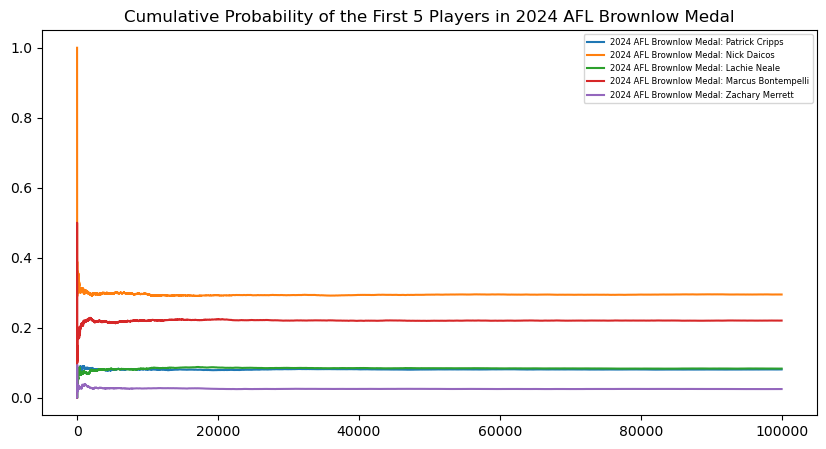

Probability of the first player in 2024 AFL Brownlow Medal is 0.0 after 10 samples
Probability of the first player in 2024 AFL Brownlow Medal is 0.06 after 100 samples
Probability of the first player in 2024 AFL Brownlow Medal is 0.09 after 1000 samples
Probability of the first player in 2024 AFL Brownlow Medal is 0.08 after 10000 samples
Probability of the first player in 2024 AFL Brownlow Medal is 0.08 after 20000 samples
Probability of the first player in 2024 AFL Brownlow Medal is 0.08 after 30000 samples
Probability of the first player in 2024 AFL Brownlow Medal is 0.08 after 40000 samples
Probability of the first player in 2024 AFL Brownlow Medal is 0.08 after 50000 samples
Probability of the first player in 2024 AFL Brownlow Medal is 0.08 after 60000 samples
Probability of the first player in 2024 AFL Brownlow Medal is 0.08 after 70000 samples
Probability of the first player in 2024 AFL Brownlow Medal is 0.08 after 80000 samples
Probability of the first player in 2024 AFL Brownl

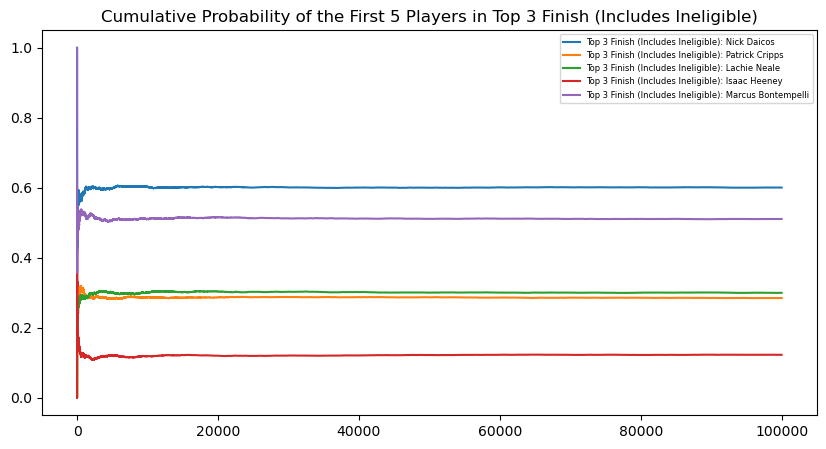

Probability of the first player in Top 3 Finish (Includes Ineligible) is 0.5 after 10 samples
Probability of the first player in Top 3 Finish (Includes Ineligible) is 0.56 after 100 samples
Probability of the first player in Top 3 Finish (Includes Ineligible) is 0.58 after 1000 samples
Probability of the first player in Top 3 Finish (Includes Ineligible) is 0.6 after 10000 samples
Probability of the first player in Top 3 Finish (Includes Ineligible) is 0.6 after 20000 samples
Probability of the first player in Top 3 Finish (Includes Ineligible) is 0.6 after 30000 samples
Probability of the first player in Top 3 Finish (Includes Ineligible) is 0.6 after 40000 samples
Probability of the first player in Top 3 Finish (Includes Ineligible) is 0.6 after 50000 samples
Probability of the first player in Top 3 Finish (Includes Ineligible) is 0.6 after 60000 samples
Probability of the first player in Top 3 Finish (Includes Ineligible) is 0.6 after 70000 samples
Probability of the first player in

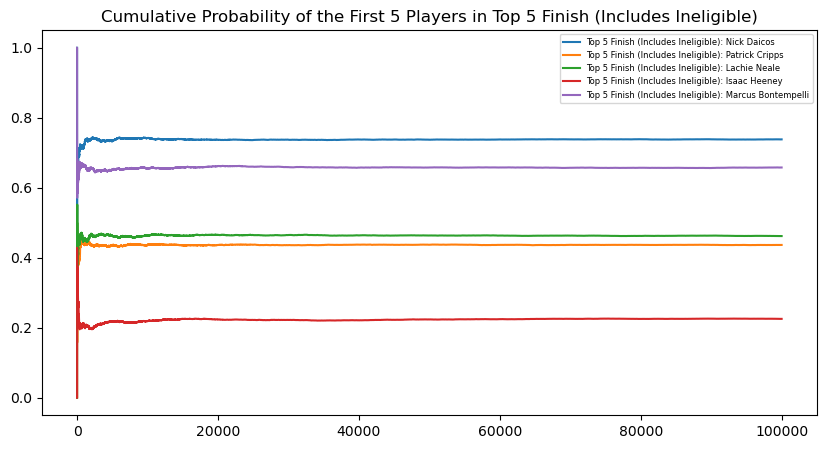

Probability of the first player in Top 5 Finish (Includes Ineligible) is 0.7 after 10 samples
Probability of the first player in Top 5 Finish (Includes Ineligible) is 0.69 after 100 samples
Probability of the first player in Top 5 Finish (Includes Ineligible) is 0.72 after 1000 samples
Probability of the first player in Top 5 Finish (Includes Ineligible) is 0.74 after 10000 samples
Probability of the first player in Top 5 Finish (Includes Ineligible) is 0.74 after 20000 samples
Probability of the first player in Top 5 Finish (Includes Ineligible) is 0.74 after 30000 samples
Probability of the first player in Top 5 Finish (Includes Ineligible) is 0.74 after 40000 samples
Probability of the first player in Top 5 Finish (Includes Ineligible) is 0.74 after 50000 samples
Probability of the first player in Top 5 Finish (Includes Ineligible) is 0.74 after 60000 samples
Probability of the first player in Top 5 Finish (Includes Ineligible) is 0.74 after 70000 samples
Probability of the first pl

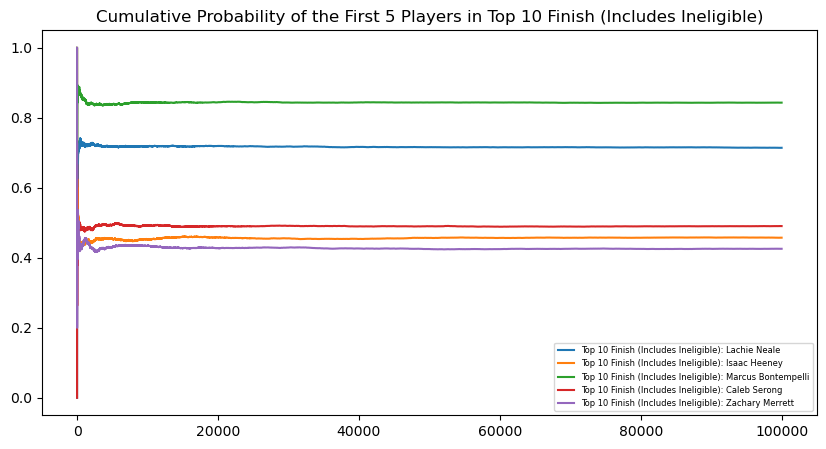

Probability of the first player in Top 10 Finish (Includes Ineligible) is 0.5 after 10 samples
Probability of the first player in Top 10 Finish (Includes Ineligible) is 0.69 after 100 samples
Probability of the first player in Top 10 Finish (Includes Ineligible) is 0.72 after 1000 samples
Probability of the first player in Top 10 Finish (Includes Ineligible) is 0.72 after 10000 samples
Probability of the first player in Top 10 Finish (Includes Ineligible) is 0.72 after 20000 samples
Probability of the first player in Top 10 Finish (Includes Ineligible) is 0.72 after 30000 samples
Probability of the first player in Top 10 Finish (Includes Ineligible) is 0.72 after 40000 samples
Probability of the first player in Top 10 Finish (Includes Ineligible) is 0.72 after 50000 samples
Probability of the first player in Top 10 Finish (Includes Ineligible) is 0.72 after 60000 samples
Probability of the first player in Top 10 Finish (Includes Ineligible) is 0.72 after 70000 samples
Probability of th

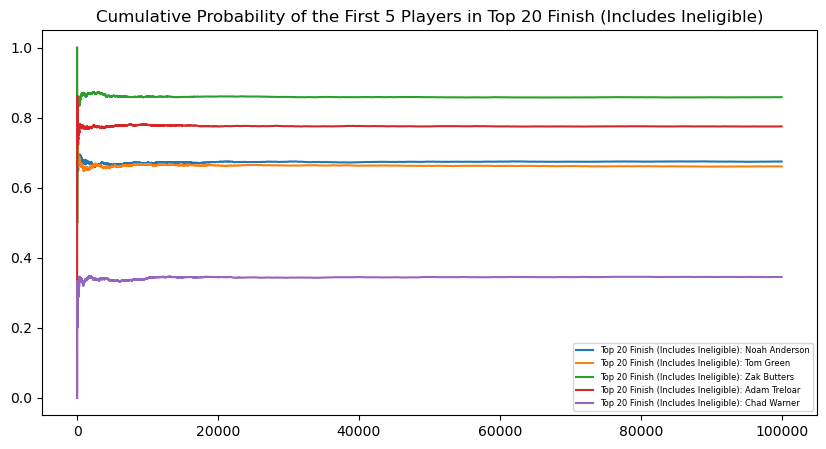

Probability of the first player in Top 20 Finish (Includes Ineligible) is 0.8 after 10 samples
Probability of the first player in Top 20 Finish (Includes Ineligible) is 0.73 after 100 samples
Probability of the first player in Top 20 Finish (Includes Ineligible) is 0.67 after 1000 samples
Probability of the first player in Top 20 Finish (Includes Ineligible) is 0.67 after 10000 samples
Probability of the first player in Top 20 Finish (Includes Ineligible) is 0.67 after 20000 samples
Probability of the first player in Top 20 Finish (Includes Ineligible) is 0.67 after 30000 samples
Probability of the first player in Top 20 Finish (Includes Ineligible) is 0.67 after 40000 samples
Probability of the first player in Top 20 Finish (Includes Ineligible) is 0.67 after 50000 samples
Probability of the first player in Top 20 Finish (Includes Ineligible) is 0.67 after 60000 samples
Probability of the first player in Top 20 Finish (Includes Ineligible) is 0.67 after 70000 samples
Probability of th

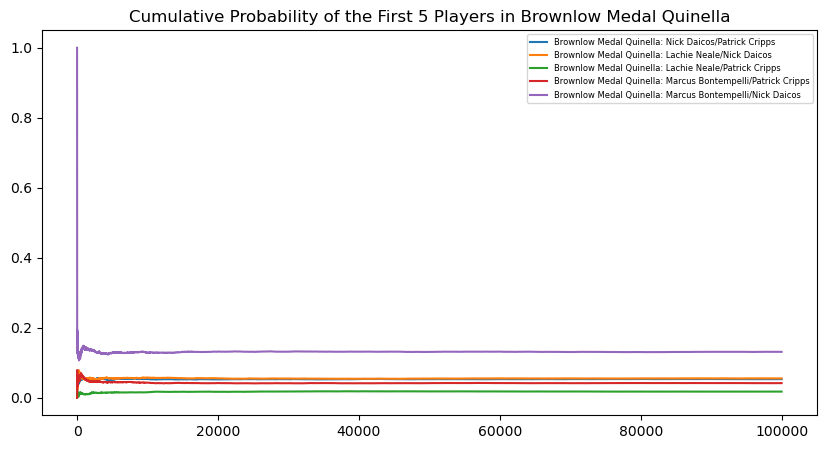

Probability of the first player in Brownlow Medal Quinella is 0.0 after 10 samples
Probability of the first player in Brownlow Medal Quinella is 0.03 after 100 samples
Probability of the first player in Brownlow Medal Quinella is 0.05 after 1000 samples
Probability of the first player in Brownlow Medal Quinella is 0.05 after 10000 samples
Probability of the first player in Brownlow Medal Quinella is 0.05 after 20000 samples
Probability of the first player in Brownlow Medal Quinella is 0.05 after 30000 samples
Probability of the first player in Brownlow Medal Quinella is 0.05 after 40000 samples
Probability of the first player in Brownlow Medal Quinella is 0.05 after 50000 samples
Probability of the first player in Brownlow Medal Quinella is 0.05 after 60000 samples
Probability of the first player in Brownlow Medal Quinella is 0.05 after 70000 samples
Probability of the first player in Brownlow Medal Quinella is 0.05 after 80000 samples
Probability of the first player in Brownlow Medal 

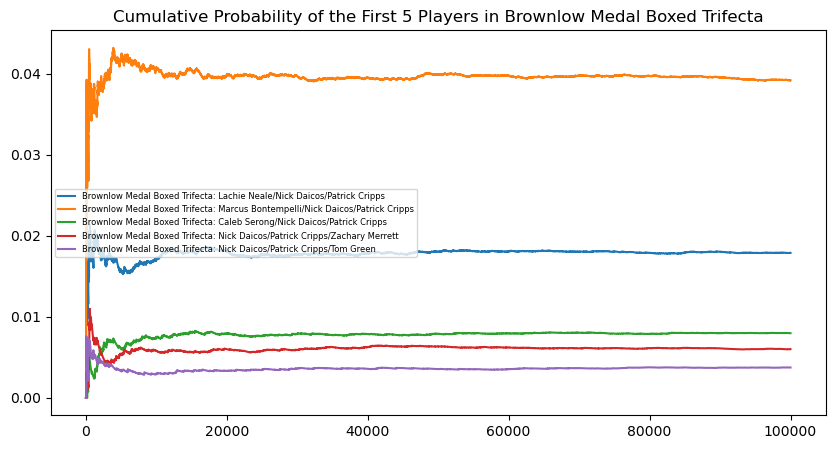

Probability of the first player in Brownlow Medal Boxed Trifecta is 0.0 after 10 samples
Probability of the first player in Brownlow Medal Boxed Trifecta is 0.02 after 100 samples
Probability of the first player in Brownlow Medal Boxed Trifecta is 0.02 after 1000 samples
Probability of the first player in Brownlow Medal Boxed Trifecta is 0.02 after 10000 samples
Probability of the first player in Brownlow Medal Boxed Trifecta is 0.02 after 20000 samples
Probability of the first player in Brownlow Medal Boxed Trifecta is 0.02 after 30000 samples
Probability of the first player in Brownlow Medal Boxed Trifecta is 0.02 after 40000 samples
Probability of the first player in Brownlow Medal Boxed Trifecta is 0.02 after 50000 samples
Probability of the first player in Brownlow Medal Boxed Trifecta is 0.02 after 60000 samples
Probability of the first player in Brownlow Medal Boxed Trifecta is 0.02 after 70000 samples
Probability of the first player in Brownlow Medal Boxed Trifecta is 0.02 afte

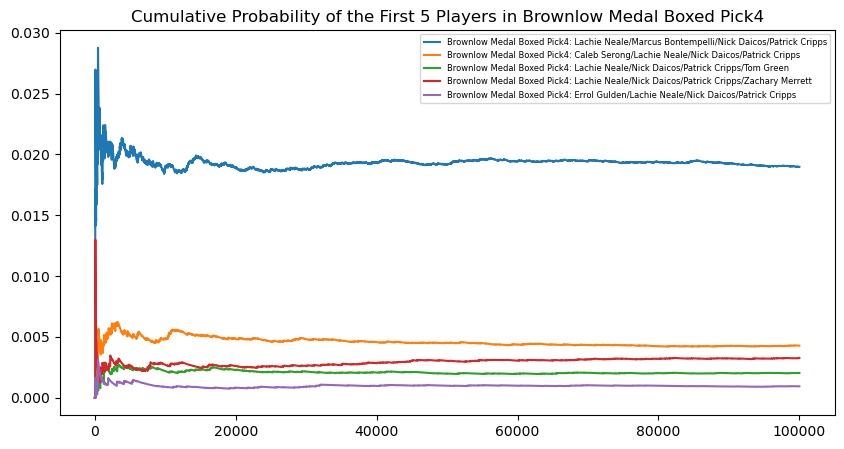

Probability of the first player in Brownlow Medal Boxed Pick4 is 0.0 after 10 samples
Probability of the first player in Brownlow Medal Boxed Pick4 is 0.02 after 100 samples
Probability of the first player in Brownlow Medal Boxed Pick4 is 0.02 after 1000 samples
Probability of the first player in Brownlow Medal Boxed Pick4 is 0.02 after 10000 samples
Probability of the first player in Brownlow Medal Boxed Pick4 is 0.02 after 20000 samples
Probability of the first player in Brownlow Medal Boxed Pick4 is 0.02 after 30000 samples
Probability of the first player in Brownlow Medal Boxed Pick4 is 0.02 after 40000 samples
Probability of the first player in Brownlow Medal Boxed Pick4 is 0.02 after 50000 samples
Probability of the first player in Brownlow Medal Boxed Pick4 is 0.02 after 60000 samples
Probability of the first player in Brownlow Medal Boxed Pick4 is 0.02 after 70000 samples
Probability of the first player in Brownlow Medal Boxed Pick4 is 0.02 after 80000 samples
Probability of th

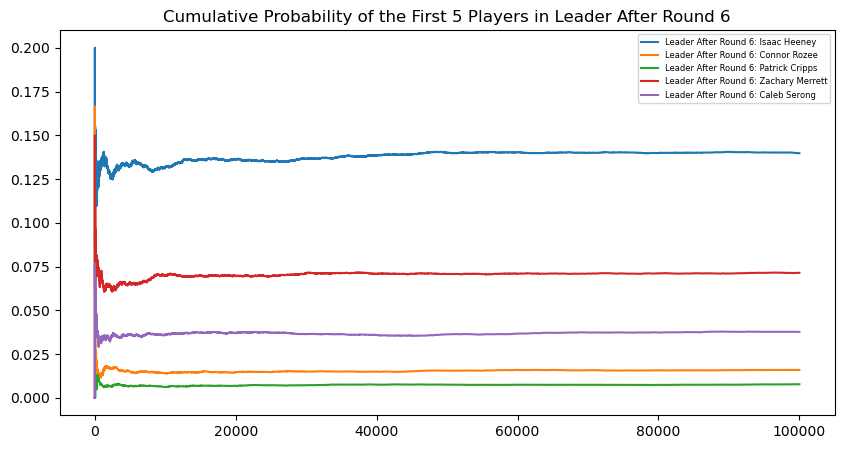

Probability of the first player in Leader After Round 6 is 0.1 after 10 samples
Probability of the first player in Leader After Round 6 is 0.15 after 100 samples
Probability of the first player in Leader After Round 6 is 0.14 after 1000 samples
Probability of the first player in Leader After Round 6 is 0.13 after 10000 samples
Probability of the first player in Leader After Round 6 is 0.14 after 20000 samples
Probability of the first player in Leader After Round 6 is 0.14 after 30000 samples
Probability of the first player in Leader After Round 6 is 0.14 after 40000 samples
Probability of the first player in Leader After Round 6 is 0.14 after 50000 samples
Probability of the first player in Leader After Round 6 is 0.14 after 60000 samples
Probability of the first player in Leader After Round 6 is 0.14 after 70000 samples
Probability of the first player in Leader After Round 6 is 0.14 after 80000 samples
Probability of the first player in Leader After Round 6 is 0.14 after 90000 samples

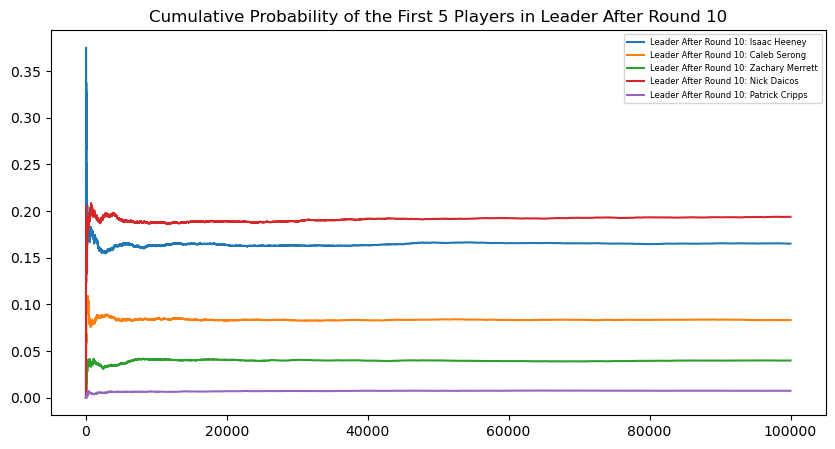

Probability of the first player in Leader After Round 10 is 0.25 after 10 samples
Probability of the first player in Leader After Round 10 is 0.25 after 100 samples
Probability of the first player in Leader After Round 10 is 0.18 after 1000 samples
Probability of the first player in Leader After Round 10 is 0.16 after 10000 samples
Probability of the first player in Leader After Round 10 is 0.16 after 20000 samples
Probability of the first player in Leader After Round 10 is 0.16 after 30000 samples
Probability of the first player in Leader After Round 10 is 0.16 after 40000 samples
Probability of the first player in Leader After Round 10 is 0.17 after 50000 samples
Probability of the first player in Leader After Round 10 is 0.17 after 60000 samples
Probability of the first player in Leader After Round 10 is 0.17 after 70000 samples
Probability of the first player in Leader After Round 10 is 0.16 after 80000 samples
Probability of the first player in Leader After Round 10 is 0.17 after 

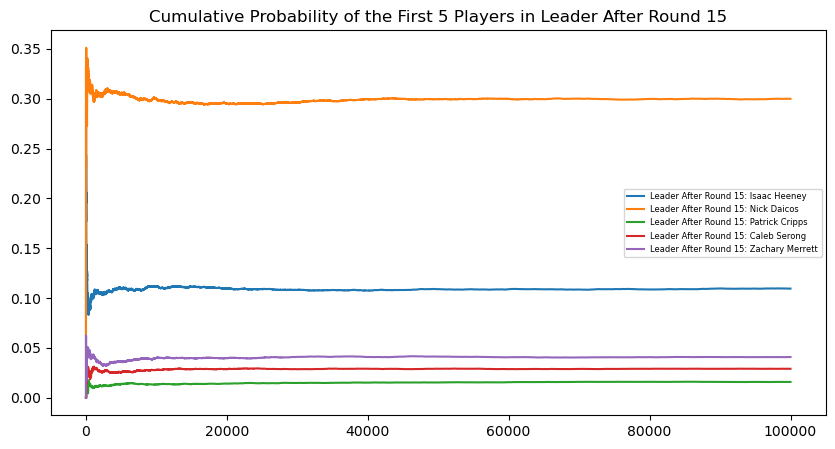

Probability of the first player in Leader After Round 15 is 0.15 after 10 samples
Probability of the first player in Leader After Round 15 is 0.15 after 100 samples
Probability of the first player in Leader After Round 15 is 0.1 after 1000 samples
Probability of the first player in Leader After Round 15 is 0.11 after 10000 samples
Probability of the first player in Leader After Round 15 is 0.11 after 20000 samples
Probability of the first player in Leader After Round 15 is 0.11 after 30000 samples
Probability of the first player in Leader After Round 15 is 0.11 after 40000 samples
Probability of the first player in Leader After Round 15 is 0.11 after 50000 samples
Probability of the first player in Leader After Round 15 is 0.11 after 60000 samples
Probability of the first player in Leader After Round 15 is 0.11 after 70000 samples
Probability of the first player in Leader After Round 15 is 0.11 after 80000 samples
Probability of the first player in Leader After Round 15 is 0.11 after 9

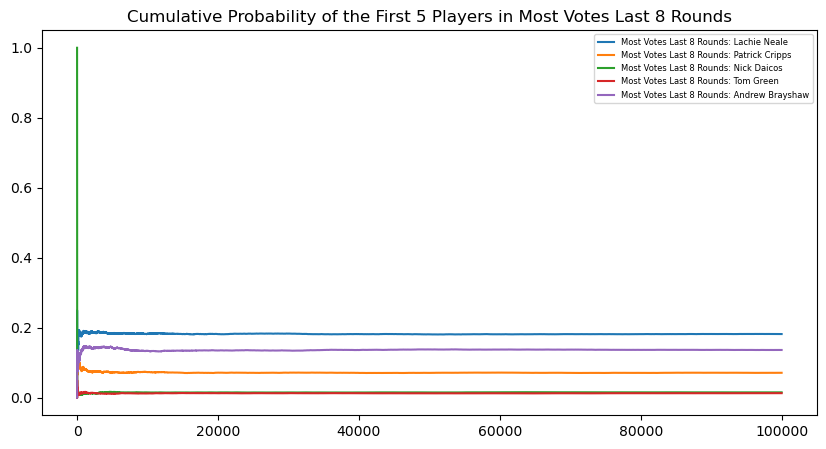

Probability of the first player in Most Votes Last 8 Rounds is 0.1 after 10 samples
Probability of the first player in Most Votes Last 8 Rounds is 0.14 after 100 samples
Probability of the first player in Most Votes Last 8 Rounds is 0.19 after 1000 samples
Probability of the first player in Most Votes Last 8 Rounds is 0.18 after 10000 samples
Probability of the first player in Most Votes Last 8 Rounds is 0.18 after 20000 samples
Probability of the first player in Most Votes Last 8 Rounds is 0.18 after 30000 samples
Probability of the first player in Most Votes Last 8 Rounds is 0.18 after 40000 samples
Probability of the first player in Most Votes Last 8 Rounds is 0.18 after 50000 samples
Probability of the first player in Most Votes Last 8 Rounds is 0.18 after 60000 samples
Probability of the first player in Most Votes Last 8 Rounds is 0.18 after 70000 samples
Probability of the first player in Most Votes Last 8 Rounds is 0.18 after 80000 samples
Probability of the first player in Most

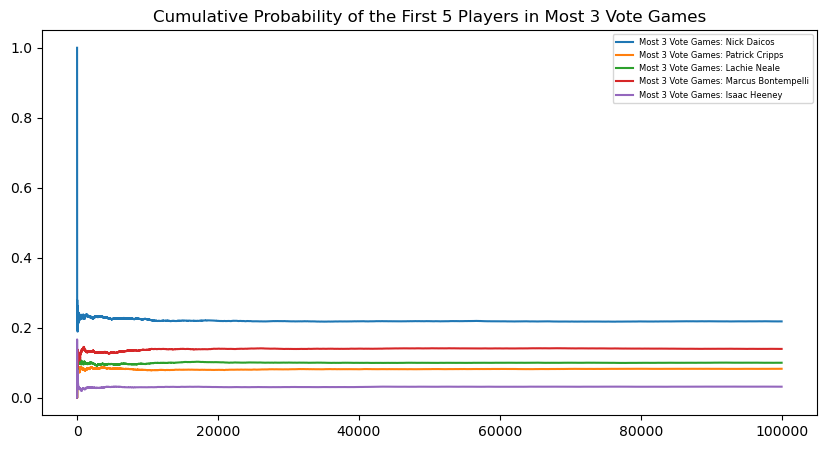

Probability of the first player in Most 3 Vote Games is 0.27 after 10 samples
Probability of the first player in Most 3 Vote Games is 0.21 after 100 samples
Probability of the first player in Most 3 Vote Games is 0.23 after 1000 samples
Probability of the first player in Most 3 Vote Games is 0.22 after 10000 samples
Probability of the first player in Most 3 Vote Games is 0.22 after 20000 samples
Probability of the first player in Most 3 Vote Games is 0.22 after 30000 samples
Probability of the first player in Most 3 Vote Games is 0.22 after 40000 samples
Probability of the first player in Most 3 Vote Games is 0.22 after 50000 samples
Probability of the first player in Most 3 Vote Games is 0.22 after 60000 samples
Probability of the first player in Most 3 Vote Games is 0.22 after 70000 samples
Probability of the first player in Most 3 Vote Games is 0.22 after 80000 samples
Probability of the first player in Most 3 Vote Games is 0.22 after 90000 samples
Probability of the first player in

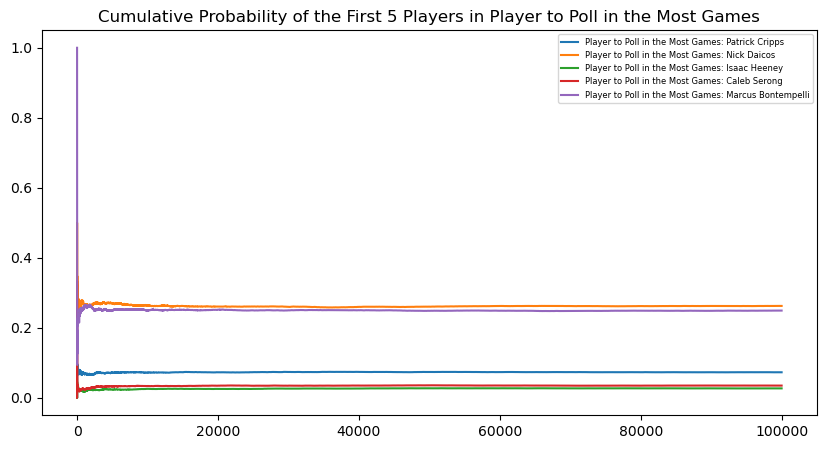

Probability of the first player in Player to Poll in the Most Games is 0.0 after 10 samples
Probability of the first player in Player to Poll in the Most Games is 0.08 after 100 samples
Probability of the first player in Player to Poll in the Most Games is 0.07 after 1000 samples
Probability of the first player in Player to Poll in the Most Games is 0.07 after 10000 samples
Probability of the first player in Player to Poll in the Most Games is 0.07 after 20000 samples
Probability of the first player in Player to Poll in the Most Games is 0.07 after 30000 samples
Probability of the first player in Player to Poll in the Most Games is 0.07 after 40000 samples
Probability of the first player in Player to Poll in the Most Games is 0.07 after 50000 samples
Probability of the first player in Player to Poll in the Most Games is 0.07 after 60000 samples
Probability of the first player in Player to Poll in the Most Games is 0.07 after 70000 samples
Probability of the first player in Player to Po

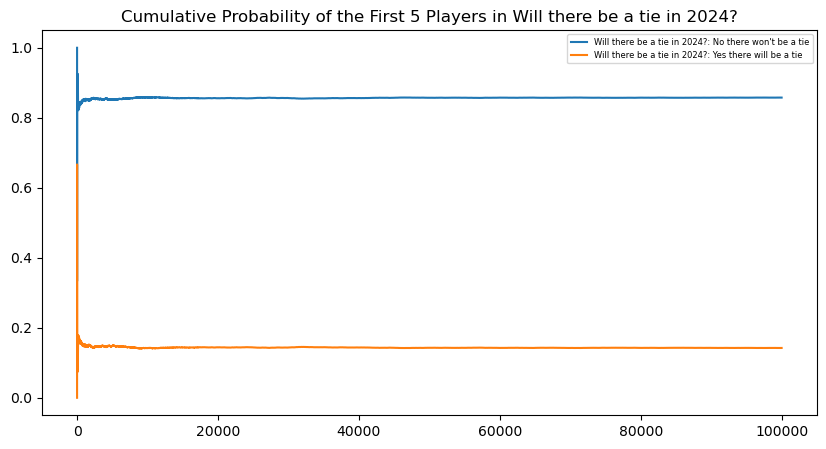

Probability of the first player in Will there be a tie in 2024? is 0.7 after 10 samples
Probability of the first player in Will there be a tie in 2024? is 0.91 after 100 samples
Probability of the first player in Will there be a tie in 2024? is 0.85 after 1000 samples
Probability of the first player in Will there be a tie in 2024? is 0.86 after 10000 samples
Probability of the first player in Will there be a tie in 2024? is 0.86 after 20000 samples
Probability of the first player in Will there be a tie in 2024? is 0.86 after 30000 samples
Probability of the first player in Will there be a tie in 2024? is 0.86 after 40000 samples
Probability of the first player in Will there be a tie in 2024? is 0.86 after 50000 samples
Probability of the first player in Will there be a tie in 2024? is 0.86 after 60000 samples
Probability of the first player in Will there be a tie in 2024? is 0.86 after 70000 samples
Probability of the first player in Will there be a tie in 2024? is 0.86 after 80000 sam

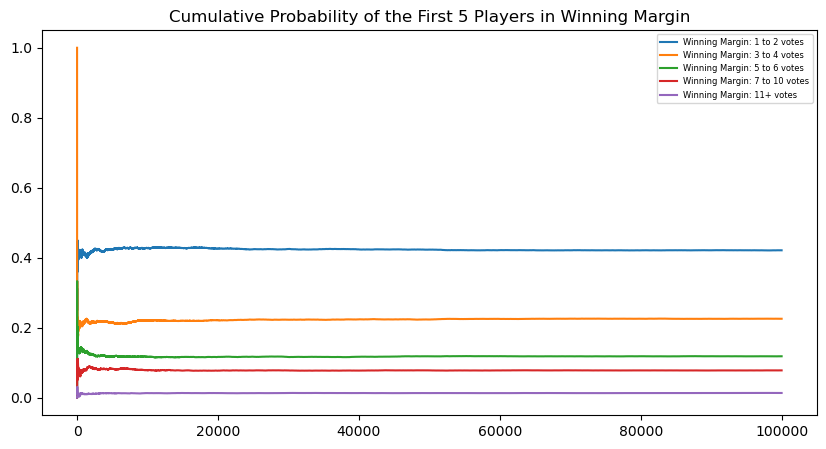

Probability of the first player in Winning Margin is 0.2 after 10 samples
Probability of the first player in Winning Margin is 0.43 after 100 samples
Probability of the first player in Winning Margin is 0.41 after 1000 samples
Probability of the first player in Winning Margin is 0.43 after 10000 samples
Probability of the first player in Winning Margin is 0.43 after 20000 samples
Probability of the first player in Winning Margin is 0.43 after 30000 samples
Probability of the first player in Winning Margin is 0.42 after 40000 samples
Probability of the first player in Winning Margin is 0.42 after 50000 samples
Probability of the first player in Winning Margin is 0.42 after 60000 samples
Probability of the first player in Winning Margin is 0.42 after 70000 samples
Probability of the first player in Winning Margin is 0.42 after 80000 samples
Probability of the first player in Winning Margin is 0.42 after 90000 samples
Probability of the first player in Winning Margin is 0.42 after 100000 

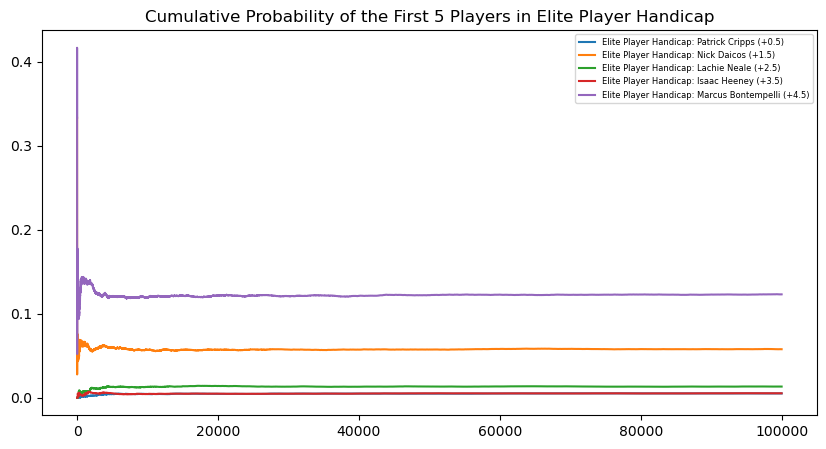

Probability of the first player in Elite Player Handicap is 0.0 after 10 samples
Probability of the first player in Elite Player Handicap is 0.0 after 100 samples
Probability of the first player in Elite Player Handicap is 0.0 after 1000 samples
Probability of the first player in Elite Player Handicap is 0.0 after 10000 samples
Probability of the first player in Elite Player Handicap is 0.0 after 20000 samples
Probability of the first player in Elite Player Handicap is 0.0 after 30000 samples
Probability of the first player in Elite Player Handicap is 0.0 after 40000 samples
Probability of the first player in Elite Player Handicap is 0.0 after 50000 samples
Probability of the first player in Elite Player Handicap is 0.01 after 60000 samples
Probability of the first player in Elite Player Handicap is 0.01 after 70000 samples
Probability of the first player in Elite Player Handicap is 0.01 after 80000 samples
Probability of the first player in Elite Player Handicap is 0.01 after 90000 sa

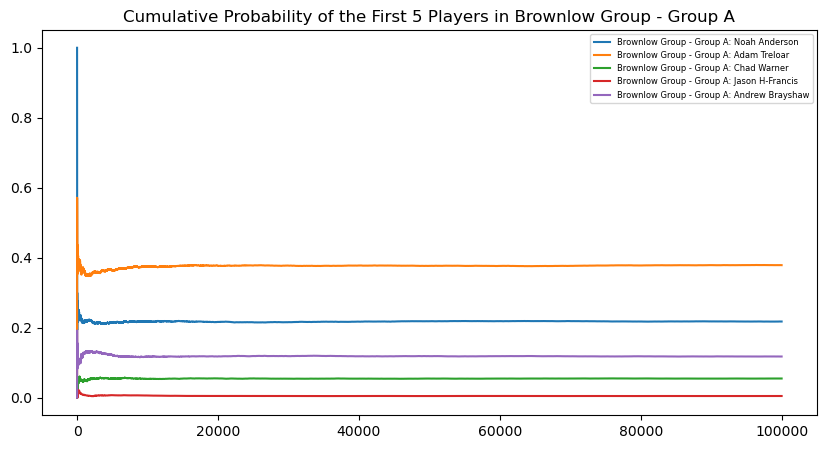

Probability of the first player in Brownlow Group - Group A is 0.3 after 10 samples
Probability of the first player in Brownlow Group - Group A is 0.26 after 100 samples
Probability of the first player in Brownlow Group - Group A is 0.22 after 1000 samples
Probability of the first player in Brownlow Group - Group A is 0.22 after 10000 samples
Probability of the first player in Brownlow Group - Group A is 0.22 after 20000 samples
Probability of the first player in Brownlow Group - Group A is 0.22 after 30000 samples
Probability of the first player in Brownlow Group - Group A is 0.22 after 40000 samples
Probability of the first player in Brownlow Group - Group A is 0.22 after 50000 samples
Probability of the first player in Brownlow Group - Group A is 0.22 after 60000 samples
Probability of the first player in Brownlow Group - Group A is 0.22 after 70000 samples
Probability of the first player in Brownlow Group - Group A is 0.22 after 80000 samples
Probability of the first player in Brow

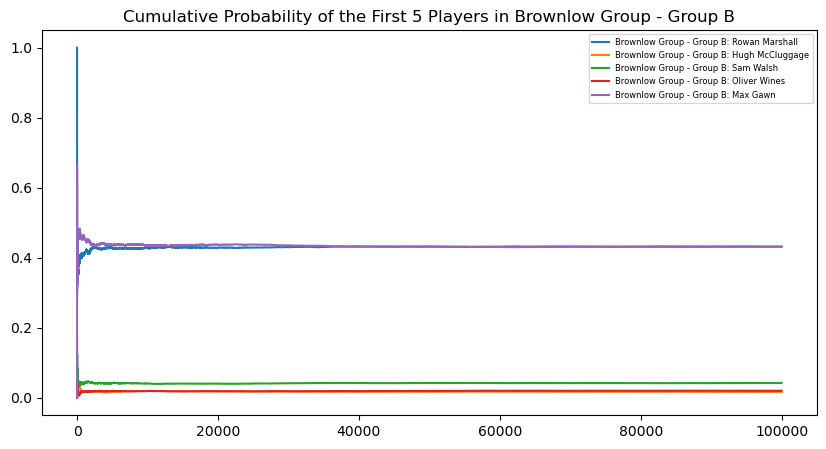

Probability of the first player in Brownlow Group - Group B is 0.55 after 10 samples
Probability of the first player in Brownlow Group - Group B is 0.36 after 100 samples
Probability of the first player in Brownlow Group - Group B is 0.41 after 1000 samples
Probability of the first player in Brownlow Group - Group B is 0.43 after 10000 samples
Probability of the first player in Brownlow Group - Group B is 0.43 after 20000 samples
Probability of the first player in Brownlow Group - Group B is 0.43 after 30000 samples
Probability of the first player in Brownlow Group - Group B is 0.43 after 40000 samples
Probability of the first player in Brownlow Group - Group B is 0.43 after 50000 samples
Probability of the first player in Brownlow Group - Group B is 0.43 after 60000 samples
Probability of the first player in Brownlow Group - Group B is 0.43 after 70000 samples
Probability of the first player in Brownlow Group - Group B is 0.43 after 80000 samples
Probability of the first player in Bro

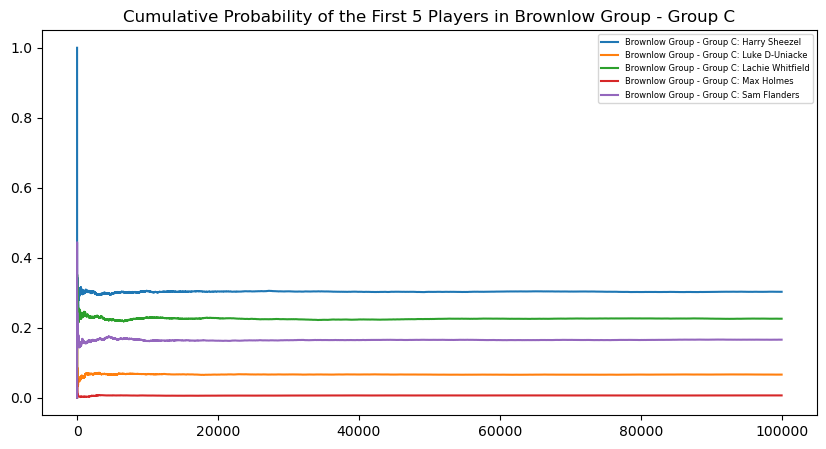

Probability of the first player in Brownlow Group - Group C is 0.3 after 10 samples
Probability of the first player in Brownlow Group - Group C is 0.27 after 100 samples
Probability of the first player in Brownlow Group - Group C is 0.3 after 1000 samples
Probability of the first player in Brownlow Group - Group C is 0.3 after 10000 samples
Probability of the first player in Brownlow Group - Group C is 0.3 after 20000 samples
Probability of the first player in Brownlow Group - Group C is 0.3 after 30000 samples
Probability of the first player in Brownlow Group - Group C is 0.3 after 40000 samples
Probability of the first player in Brownlow Group - Group C is 0.3 after 50000 samples
Probability of the first player in Brownlow Group - Group C is 0.3 after 60000 samples
Probability of the first player in Brownlow Group - Group C is 0.3 after 70000 samples
Probability of the first player in Brownlow Group - Group C is 0.3 after 80000 samples
Probability of the first player in Brownlow Grou

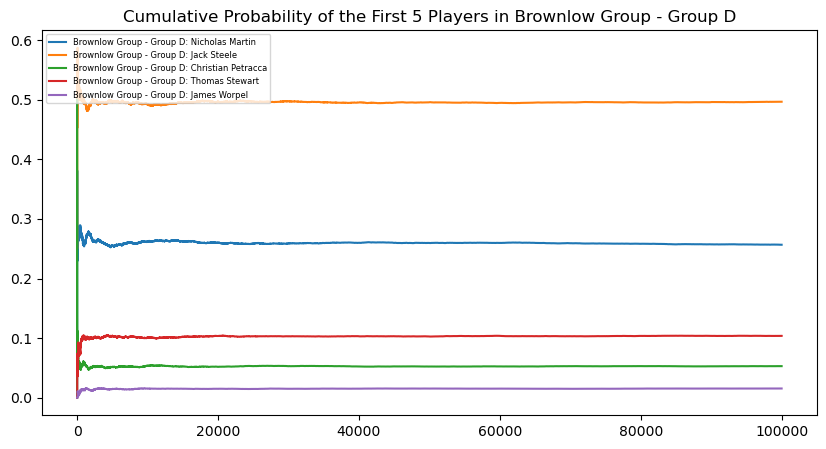

Probability of the first player in Brownlow Group - Group D is 0.25 after 10 samples
Probability of the first player in Brownlow Group - Group D is 0.27 after 100 samples
Probability of the first player in Brownlow Group - Group D is 0.25 after 1000 samples
Probability of the first player in Brownlow Group - Group D is 0.26 after 10000 samples
Probability of the first player in Brownlow Group - Group D is 0.26 after 20000 samples
Probability of the first player in Brownlow Group - Group D is 0.26 after 30000 samples
Probability of the first player in Brownlow Group - Group D is 0.26 after 40000 samples
Probability of the first player in Brownlow Group - Group D is 0.26 after 50000 samples
Probability of the first player in Brownlow Group - Group D is 0.26 after 60000 samples
Probability of the first player in Brownlow Group - Group D is 0.26 after 70000 samples
Probability of the first player in Brownlow Group - Group D is 0.26 after 80000 samples
Probability of the first player in Bro

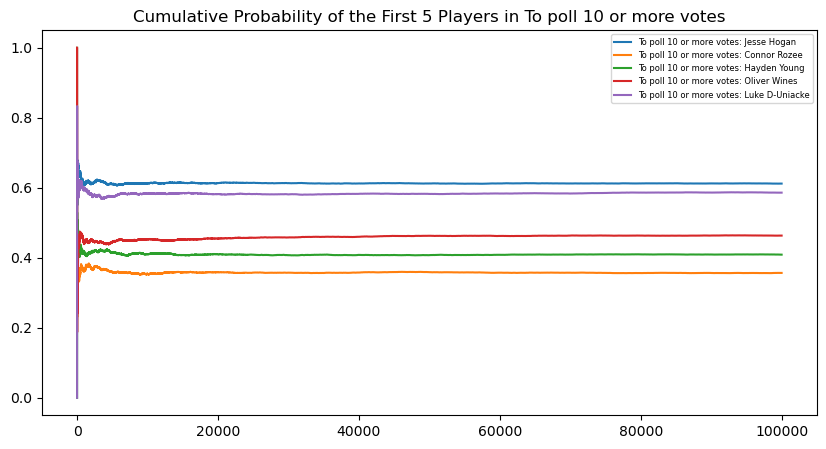

Probability of the first player in To poll 10 or more votes is 0.6 after 10 samples
Probability of the first player in To poll 10 or more votes is 0.66 after 100 samples
Probability of the first player in To poll 10 or more votes is 0.61 after 1000 samples
Probability of the first player in To poll 10 or more votes is 0.61 after 10000 samples
Probability of the first player in To poll 10 or more votes is 0.61 after 20000 samples
Probability of the first player in To poll 10 or more votes is 0.61 after 30000 samples
Probability of the first player in To poll 10 or more votes is 0.61 after 40000 samples
Probability of the first player in To poll 10 or more votes is 0.61 after 50000 samples
Probability of the first player in To poll 10 or more votes is 0.61 after 60000 samples
Probability of the first player in To poll 10 or more votes is 0.61 after 70000 samples
Probability of the first player in To poll 10 or more votes is 0.61 after 80000 samples
Probability of the first player in To p

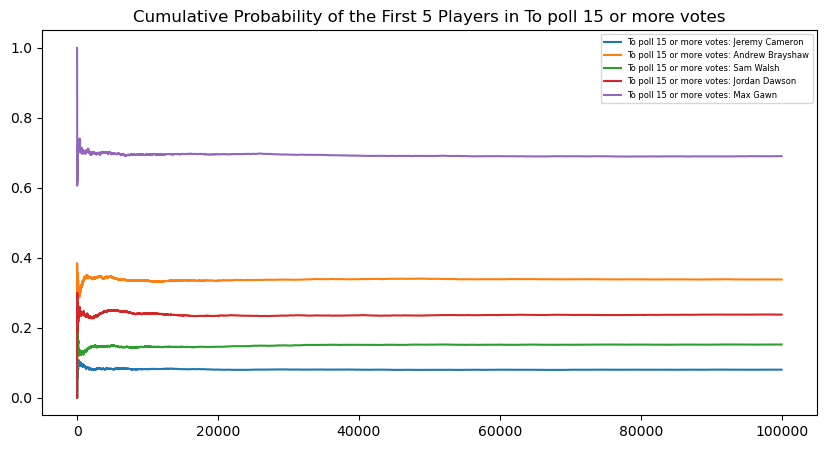

Probability of the first player in To poll 15 or more votes is 0.0 after 10 samples
Probability of the first player in To poll 15 or more votes is 0.07 after 100 samples
Probability of the first player in To poll 15 or more votes is 0.09 after 1000 samples
Probability of the first player in To poll 15 or more votes is 0.08 after 10000 samples
Probability of the first player in To poll 15 or more votes is 0.08 after 20000 samples
Probability of the first player in To poll 15 or more votes is 0.08 after 30000 samples
Probability of the first player in To poll 15 or more votes is 0.08 after 40000 samples
Probability of the first player in To poll 15 or more votes is 0.08 after 50000 samples
Probability of the first player in To poll 15 or more votes is 0.08 after 60000 samples
Probability of the first player in To poll 15 or more votes is 0.08 after 70000 samples
Probability of the first player in To poll 15 or more votes is 0.08 after 80000 samples
Probability of the first player in To p

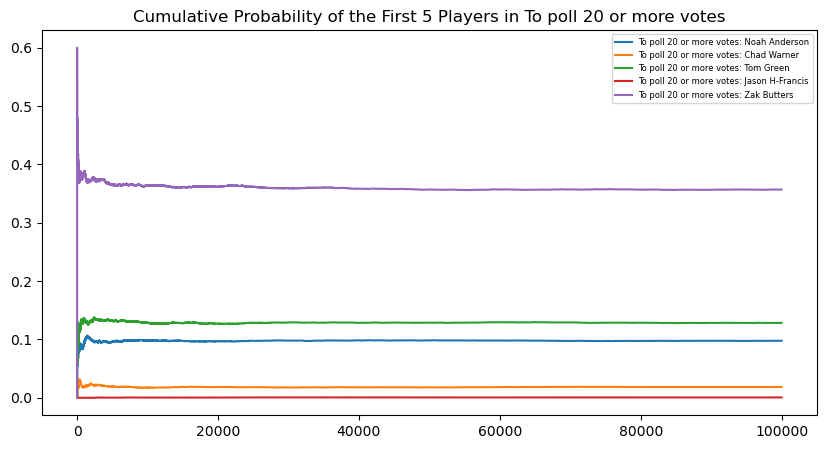

Probability of the first player in To poll 20 or more votes is 0.0 after 10 samples
Probability of the first player in To poll 20 or more votes is 0.1 after 100 samples
Probability of the first player in To poll 20 or more votes is 0.09 after 1000 samples
Probability of the first player in To poll 20 or more votes is 0.1 after 10000 samples
Probability of the first player in To poll 20 or more votes is 0.1 after 20000 samples
Probability of the first player in To poll 20 or more votes is 0.1 after 30000 samples
Probability of the first player in To poll 20 or more votes is 0.1 after 40000 samples
Probability of the first player in To poll 20 or more votes is 0.1 after 50000 samples
Probability of the first player in To poll 20 or more votes is 0.1 after 60000 samples
Probability of the first player in To poll 20 or more votes is 0.1 after 70000 samples
Probability of the first player in To poll 20 or more votes is 0.1 after 80000 samples
Probability of the first player in To poll 20 or

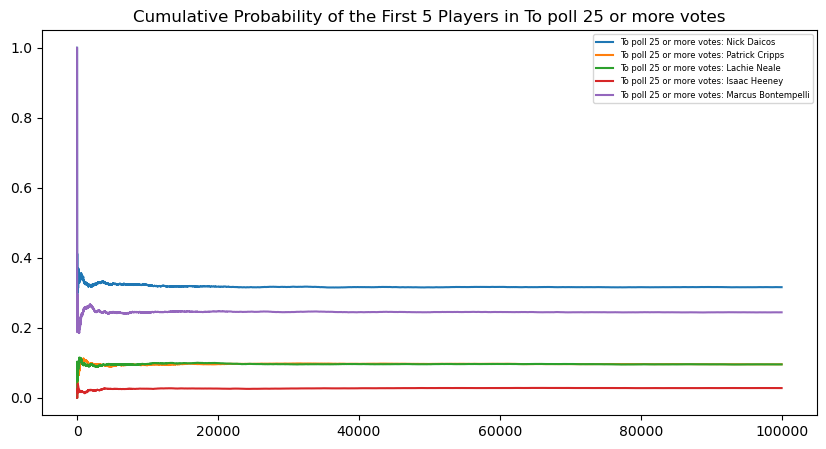

Probability of the first player in To poll 25 or more votes is 0.4 after 10 samples
Probability of the first player in To poll 25 or more votes is 0.33 after 100 samples
Probability of the first player in To poll 25 or more votes is 0.33 after 1000 samples
Probability of the first player in To poll 25 or more votes is 0.32 after 10000 samples
Probability of the first player in To poll 25 or more votes is 0.32 after 20000 samples
Probability of the first player in To poll 25 or more votes is 0.32 after 30000 samples
Probability of the first player in To poll 25 or more votes is 0.32 after 40000 samples
Probability of the first player in To poll 25 or more votes is 0.32 after 50000 samples
Probability of the first player in To poll 25 or more votes is 0.32 after 60000 samples
Probability of the first player in To poll 25 or more votes is 0.32 after 70000 samples
Probability of the first player in To poll 25 or more votes is 0.32 after 80000 samples
Probability of the first player in To p

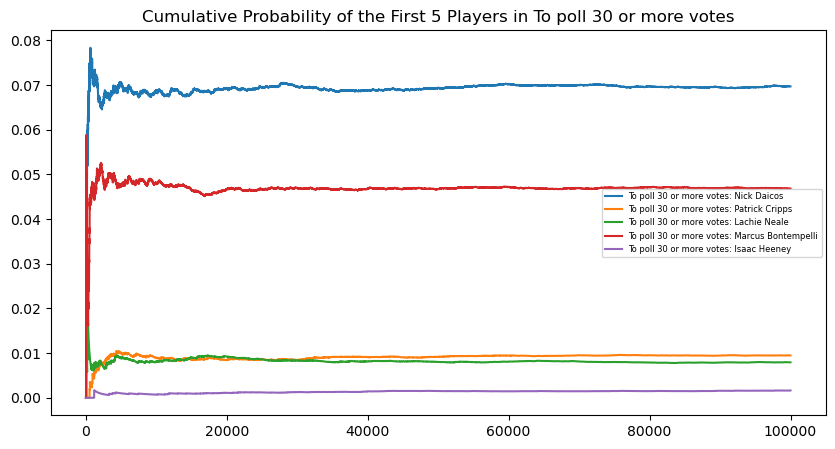

Probability of the first player in To poll 30 or more votes is 0.0 after 10 samples
Probability of the first player in To poll 30 or more votes is 0.05 after 100 samples
Probability of the first player in To poll 30 or more votes is 0.07 after 1000 samples
Probability of the first player in To poll 30 or more votes is 0.07 after 10000 samples
Probability of the first player in To poll 30 or more votes is 0.07 after 20000 samples
Probability of the first player in To poll 30 or more votes is 0.07 after 30000 samples
Probability of the first player in To poll 30 or more votes is 0.07 after 40000 samples
Probability of the first player in To poll 30 or more votes is 0.07 after 50000 samples
Probability of the first player in To poll 30 or more votes is 0.07 after 60000 samples
Probability of the first player in To poll 30 or more votes is 0.07 after 70000 samples
Probability of the first player in To poll 30 or more votes is 0.07 after 80000 samples
Probability of the first player in To p

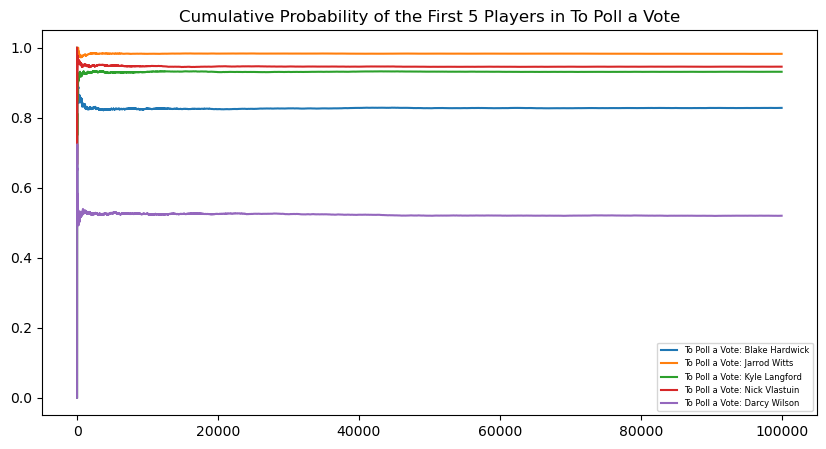

Probability of the first player in To Poll a Vote is 0.9 after 10 samples
Probability of the first player in To Poll a Vote is 0.9 after 100 samples
Probability of the first player in To Poll a Vote is 0.84 after 1000 samples
Probability of the first player in To Poll a Vote is 0.83 after 10000 samples
Probability of the first player in To Poll a Vote is 0.82 after 20000 samples
Probability of the first player in To Poll a Vote is 0.83 after 30000 samples
Probability of the first player in To Poll a Vote is 0.83 after 40000 samples
Probability of the first player in To Poll a Vote is 0.83 after 50000 samples
Probability of the first player in To Poll a Vote is 0.83 after 60000 samples
Probability of the first player in To Poll a Vote is 0.83 after 70000 samples
Probability of the first player in To Poll a Vote is 0.83 after 80000 samples
Probability of the first player in To Poll a Vote is 0.83 after 90000 samples
Probability of the first player in To Poll a Vote is 0.83 after 100000 s

In [34]:
for bet_type in odds:
    first_5_columns = [column for column in cum_prob.columns if column.split(': ')[0] == bet_type][:5]

    if len(first_5_columns) == 0:
        continue

    # Increase figure size
    plt.figure(figsize=(10, 5))  # Adjust the width (12) and height (8) as needed

    # Plot the cumulative probability of the first 5 players
    plt.plot(cum_prob[first_5_columns])

    # Get the legend with smaller text size
    plt.legend(first_5_columns, fontsize=6)

    plt.title(f'Cumulative Probability of the First 5 Players in {bet_type}')

    # Show the plot
    plt.show()

    for i in [9, 99, 999, 9999, 19999, 29999, 39999, 49999, 59999, 69999, 79999, 89999, 99999]:
        print(f'Probability of the first player in {bet_type} is {np.round(cum_prob[first_5_columns[0]].iloc[i], 2)} after {i+1} samples')
